In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)

In [3]:
df.head()

0         1         2         3         4         5         6    \
0 -0.112522 -2.827204 -3.773897 -4.349751 -4.376041 -3.474986 -2.181408   
1 -1.100878 -3.996840 -4.285843 -4.506579 -4.022377 -3.234368 -1.566126   
2 -0.567088 -2.593450 -3.874230 -4.584095 -4.187449 -3.151462 -1.742940   
3  0.490473 -1.914407 -3.616364 -4.318823 -4.268016 -3.881110 -2.993280   
4  0.800232 -0.874252 -2.384761 -3.973292 -4.338224 -3.802422 -2.534510   

        7         8         9    ...       131       132       133       134  \
0 -1.818286 -1.250522 -0.477492  ...  0.792168  0.933541  0.796958  0.578621   
1 -0.992258 -0.754680  0.042321  ...  0.538356  0.656881  0.787490  0.724046   
2 -1.490659 -1.183580 -0.394229  ...  0.886073  0.531452  0.311377 -0.021919   
3 -1.671131 -1.333884 -0.965629  ...  0.350816  0.499111  0.600345  0.842069   
4 -1.783423 -1.594450 -0.753199  ...  1.148884  0.958434  1.059025  1.371682   

        135       136       137       138       139  140  
0  0.257740  0.228077  0.123431  0.925286  0.193137  1.0  
1  0.555784  0.476333  0.773820  1.119621 -1.436250  1.0  
2 -0.713683 -0.532197  0.321097  0.904227 -0.421797  1.0  
3  0.952074  0.990133  1.086798  1.403011 -0.383564  1.0  
4  1.277392  0.960304  0.971020  1.614392  1.421456  1.0  

[5 rows x 141 columns]

In [4]:
df.shape

(4998, 141)

In [5]:
df=df.values
x=df[:,80:120]
y=df[:,-1]

In [6]:
x

array([[ 0.56908343,  0.46857572,  0.44281777, ..., -0.25469462,
        -0.29113555, -0.25649034],
       [ 0.34278528,  0.39910656,  0.3875084 , ..., -0.77786456,
        -0.77475301, -0.73340394],
       [ 0.52129639,  0.39438062,  0.40502023, ..., -0.32823831,
        -0.44813804, -0.26823009],
       ...,
       [ 0.50347121,  0.51786862,  0.53968267, ...,  0.68934601,
         0.74618143,  0.86739014],
       [ 0.14171986,  0.25606815,  0.3254214 , ...,  0.67506316,
         0.64664045,  0.63534056],
       [ 0.53999165,  0.63537814,  0.64904333, ...,  0.46212934,
         0.44251982,  0.40220108]])

In [7]:
x.shape

(4998, 40)

In [8]:
y.shape

(4998,)

In [9]:
y

array([1., 1., 1., ..., 0., 0., 0.])

<ipython-input-10-69fdff21c9a2>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


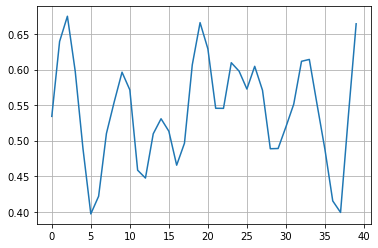

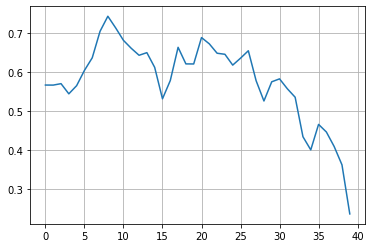

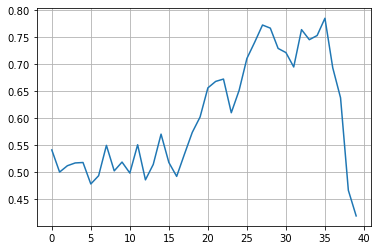

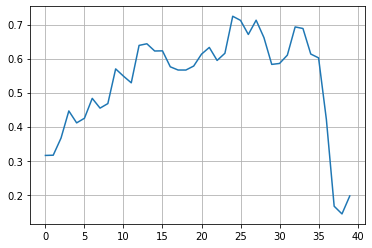

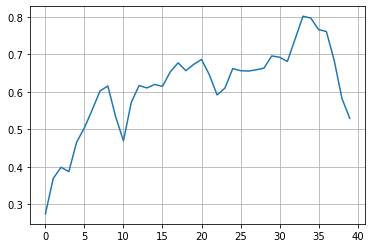

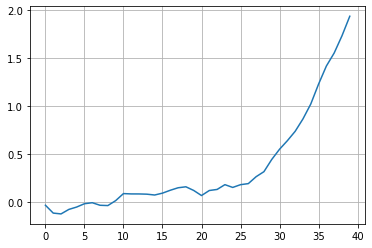

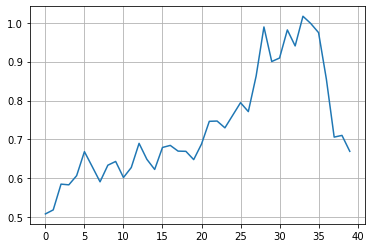

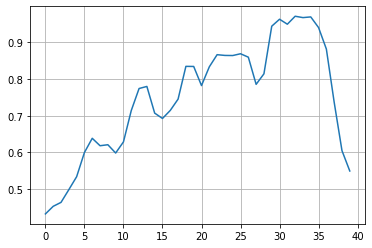

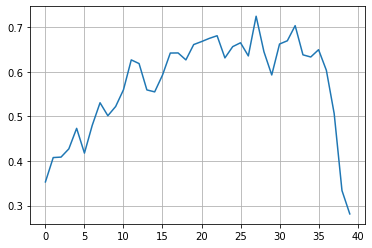

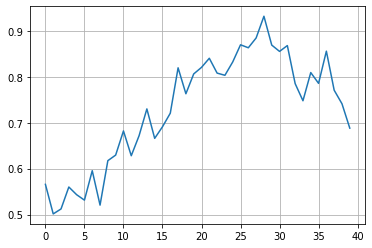

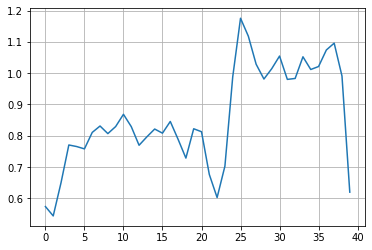

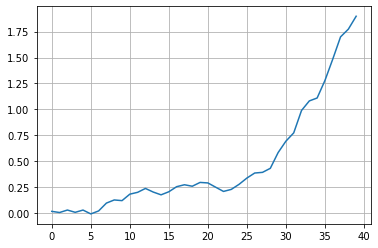

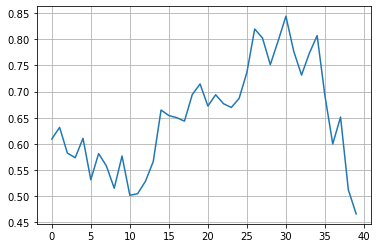

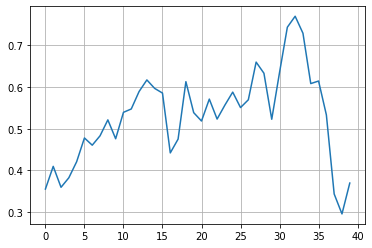

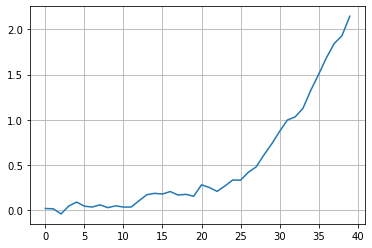

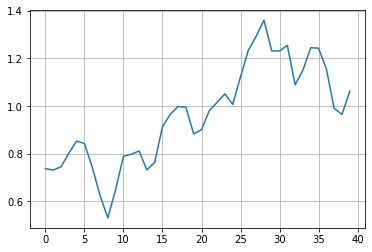

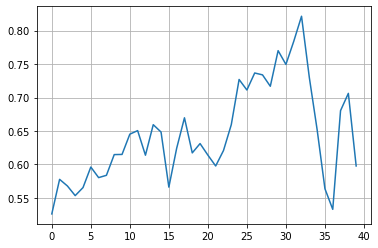

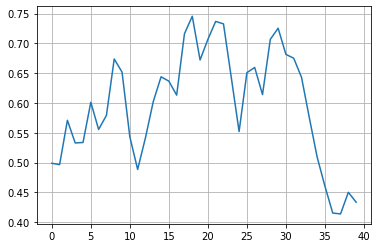

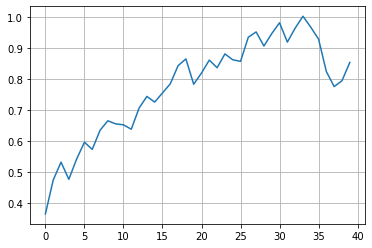

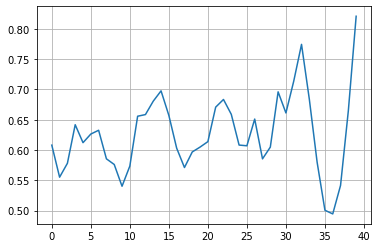

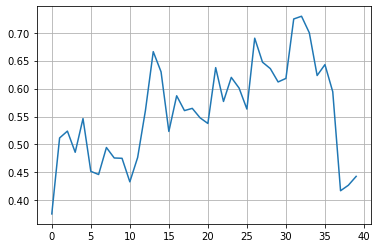

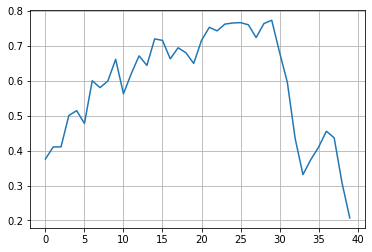

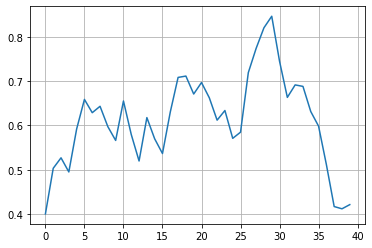

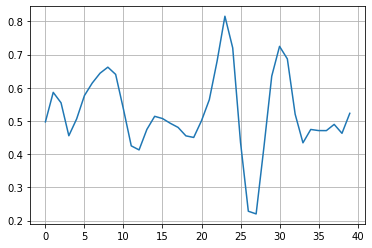

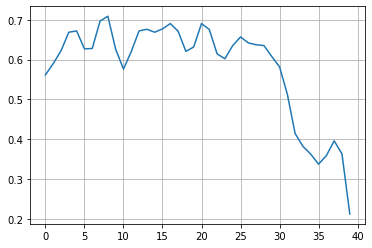

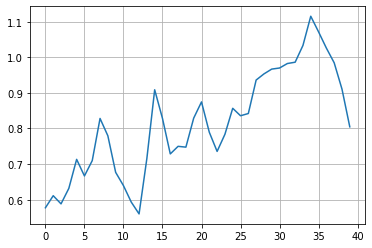

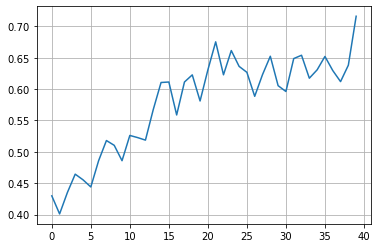

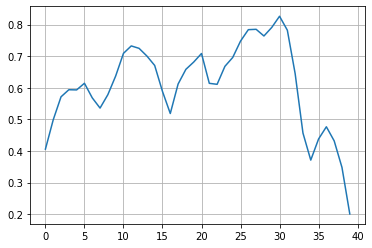

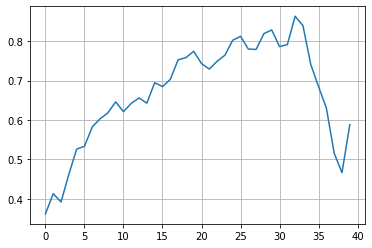

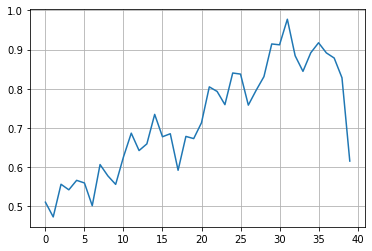

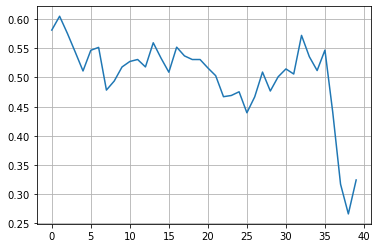

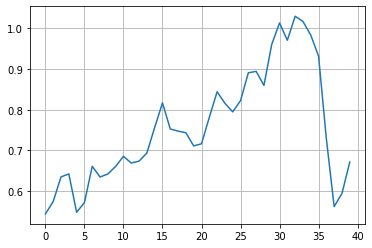

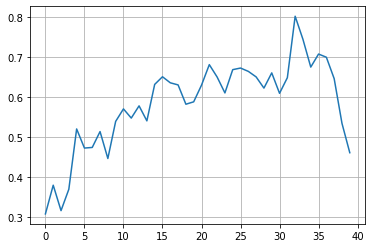

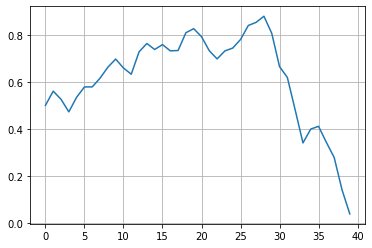

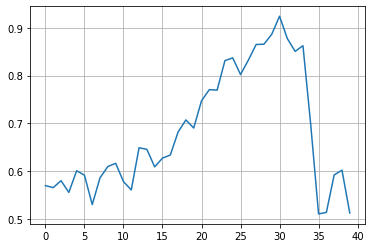

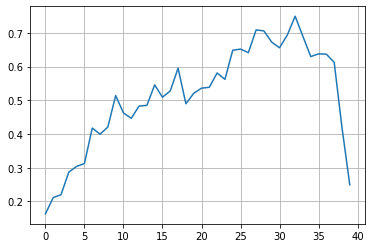

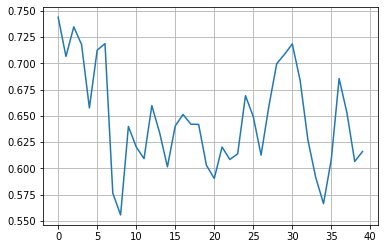

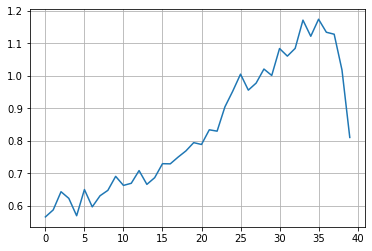

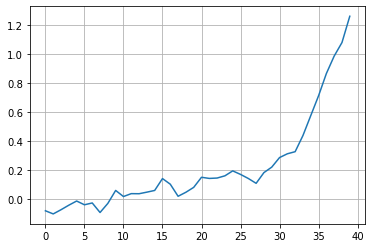

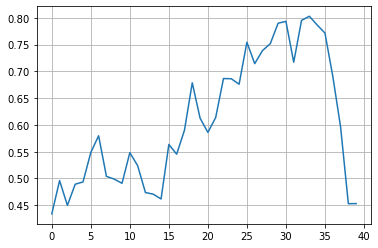

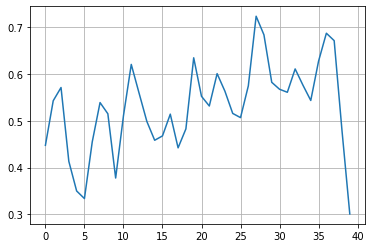

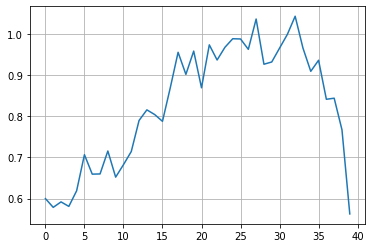

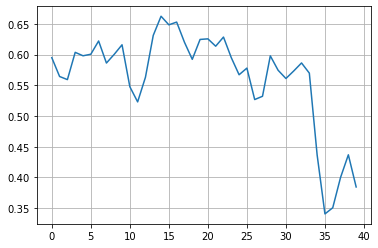

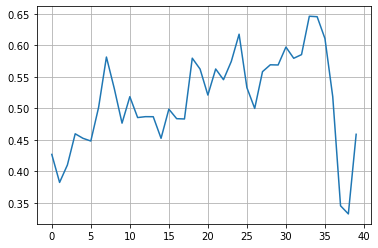

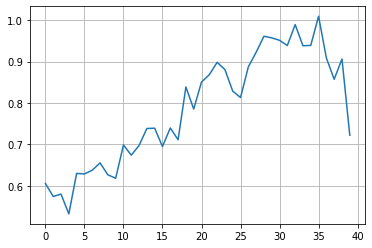

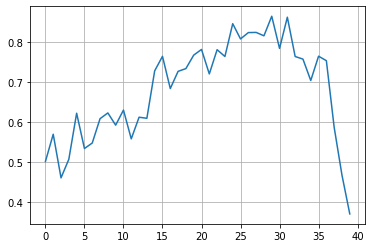

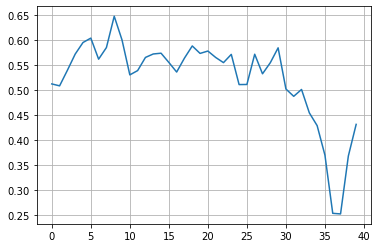

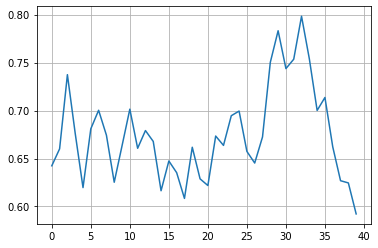

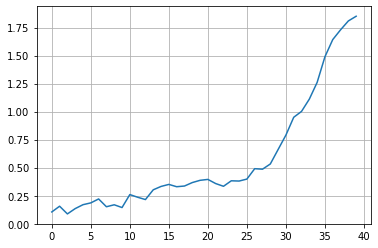

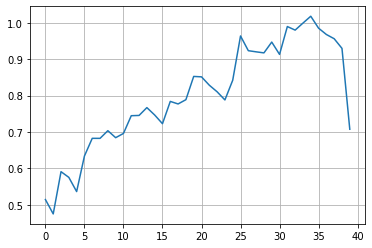

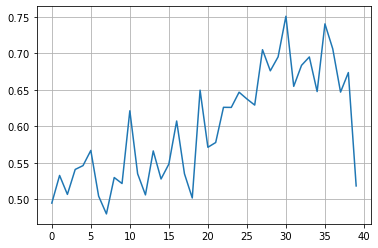

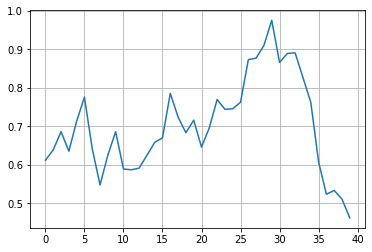

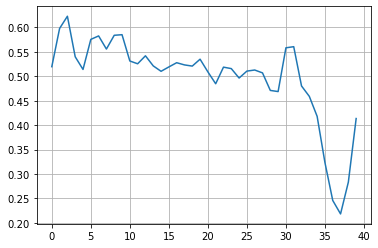

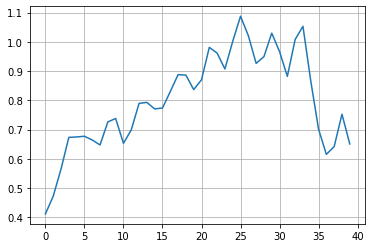

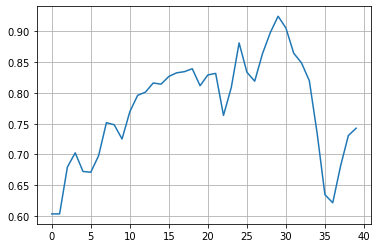

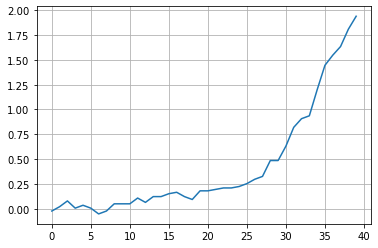

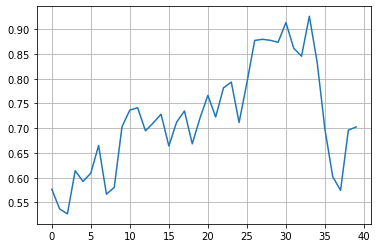

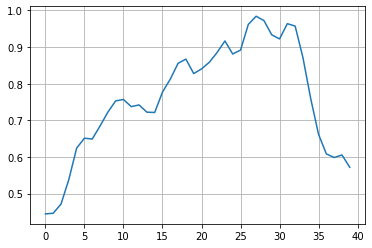

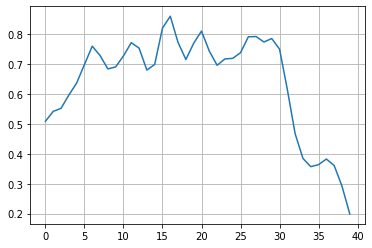

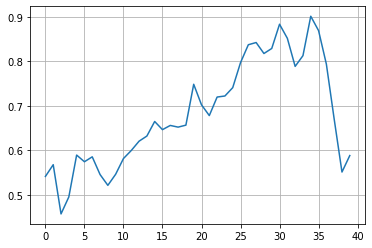

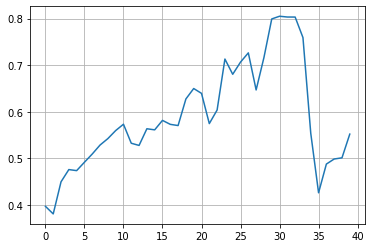

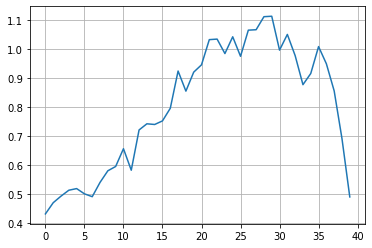

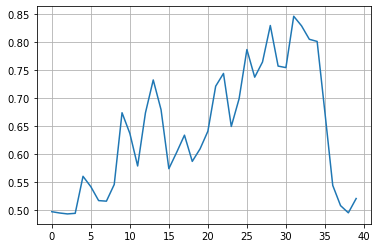

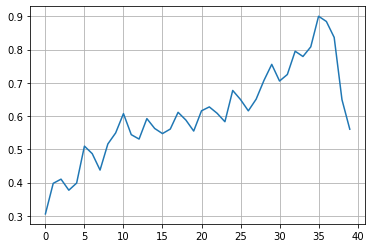

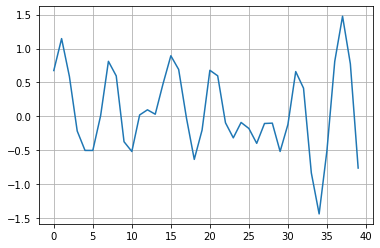

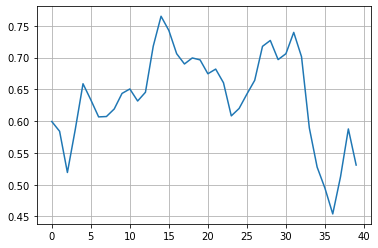

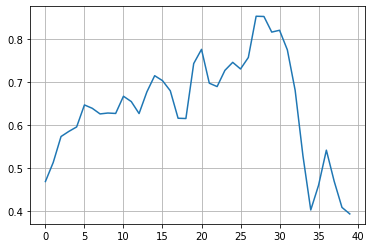

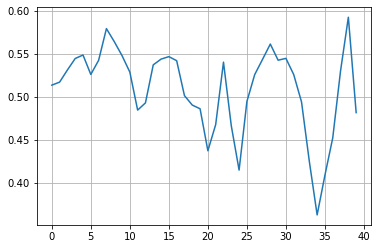

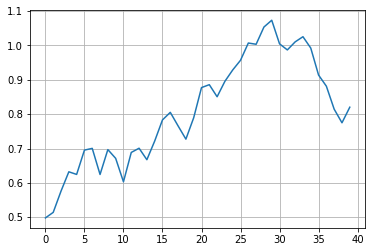

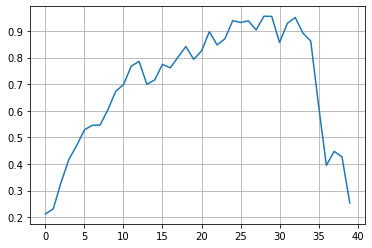

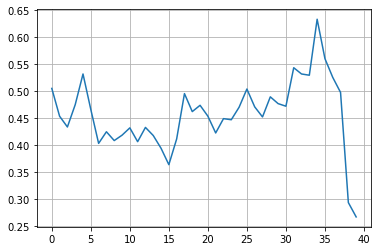

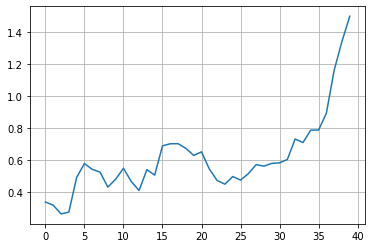

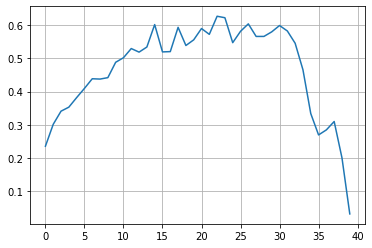

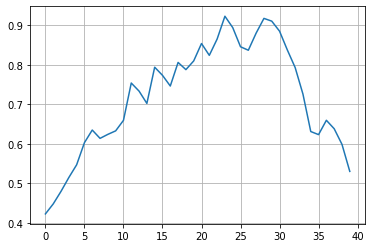

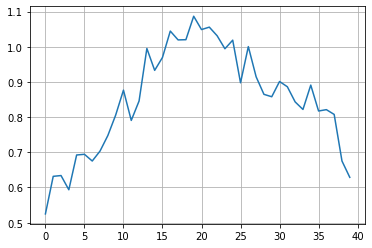

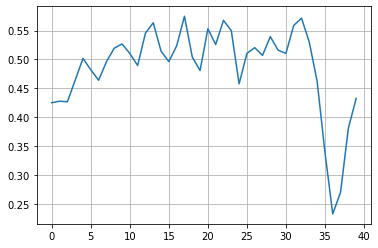

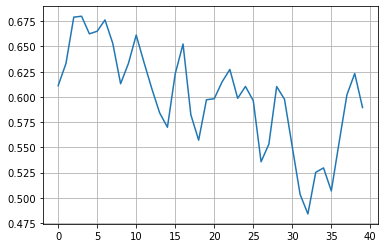

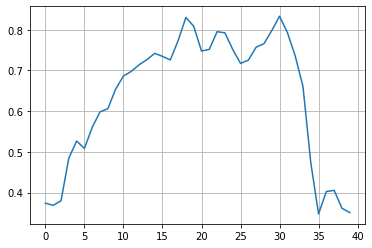

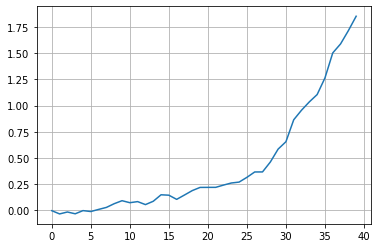

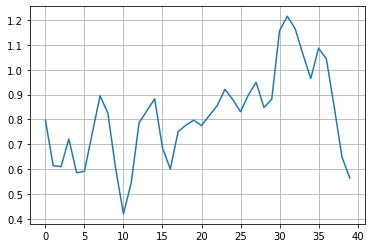

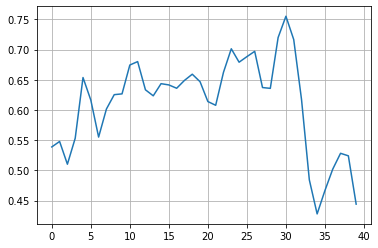

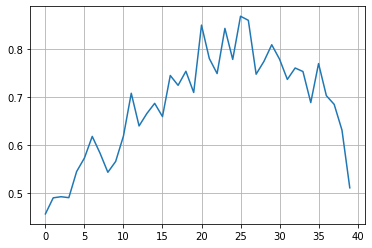

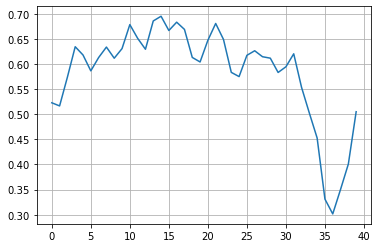

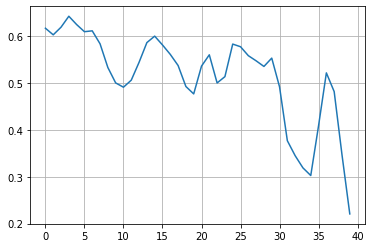

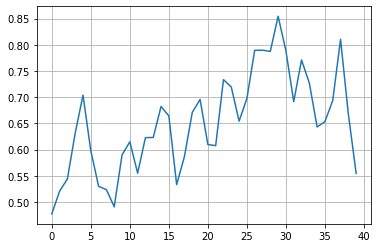

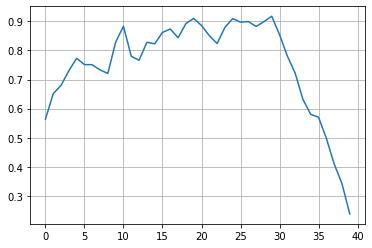

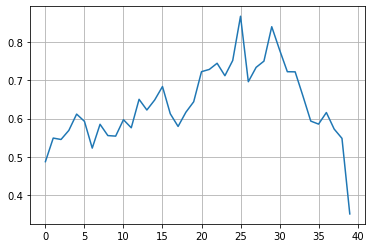

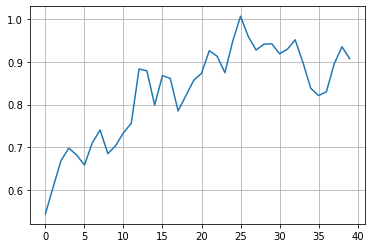

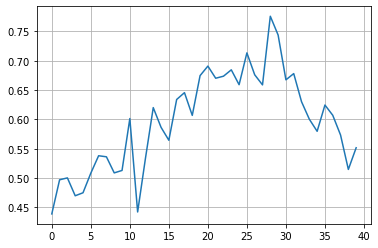

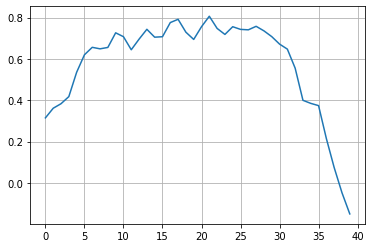

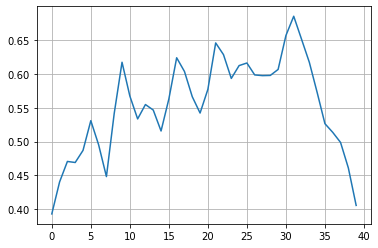

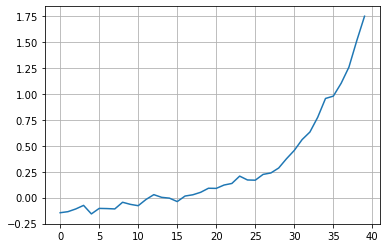

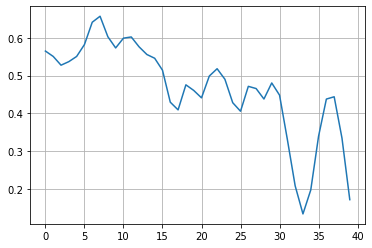

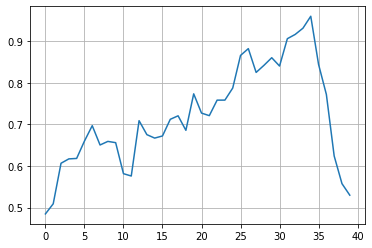

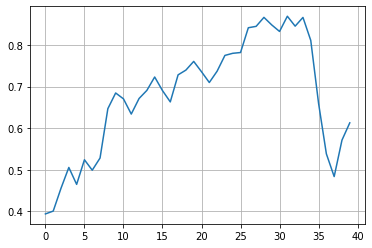

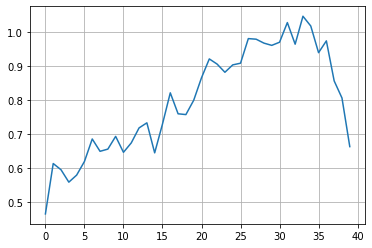

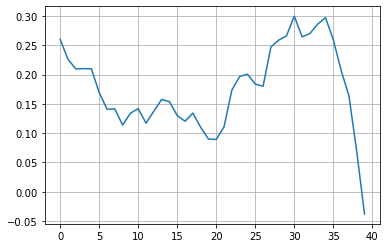

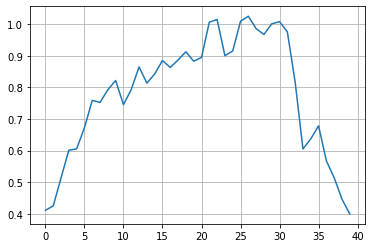

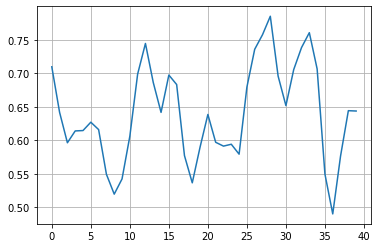

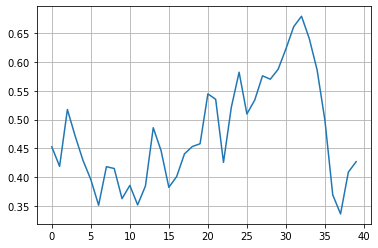

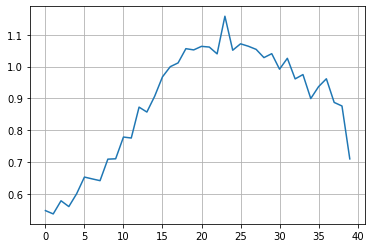

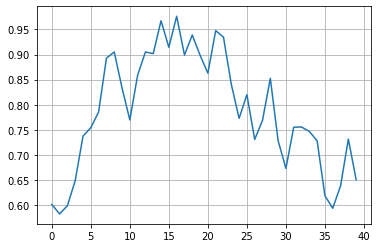

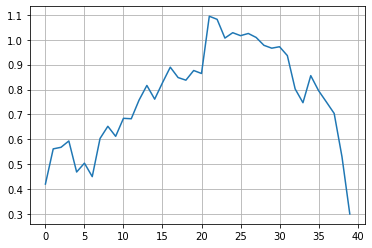

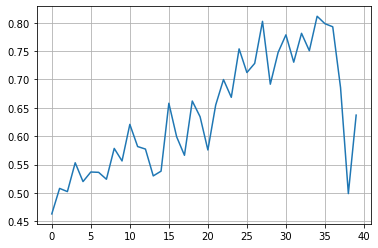

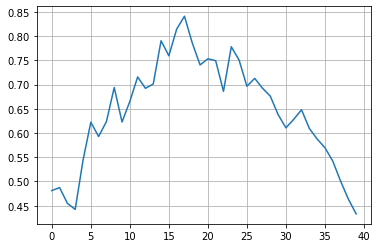

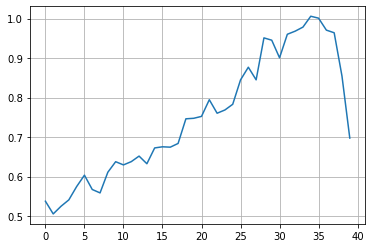

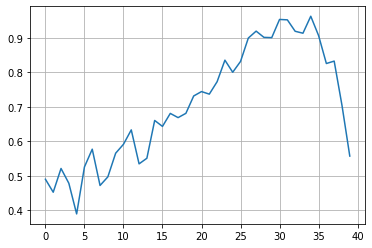

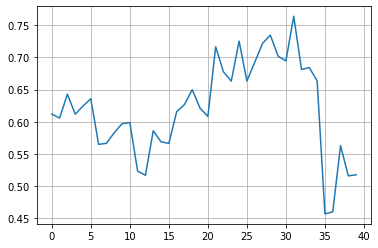

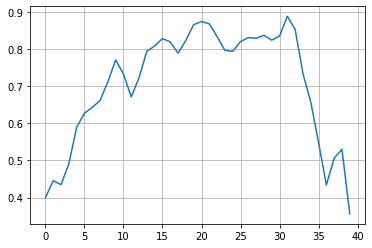

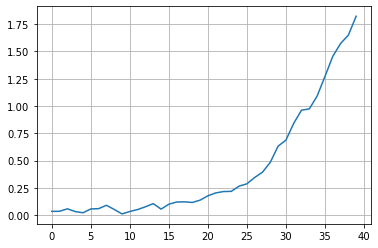

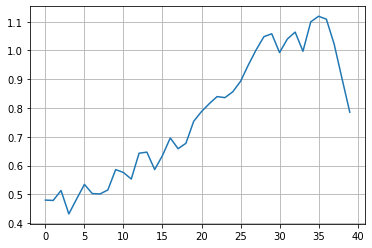

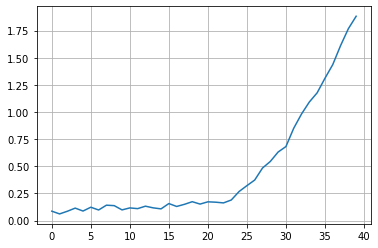

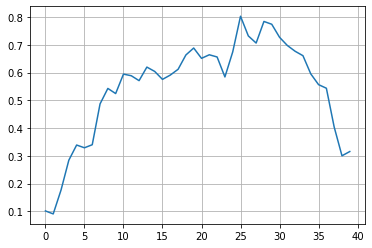

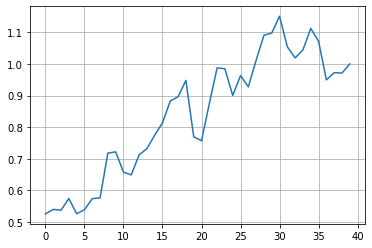

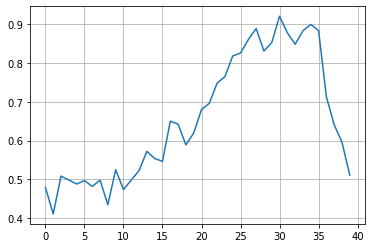

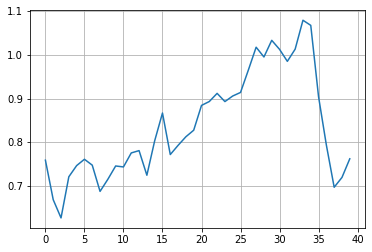

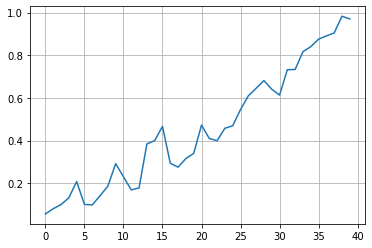

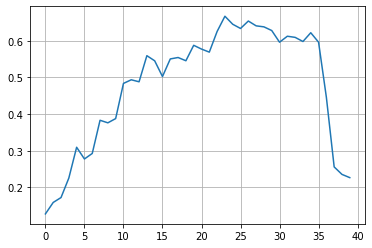

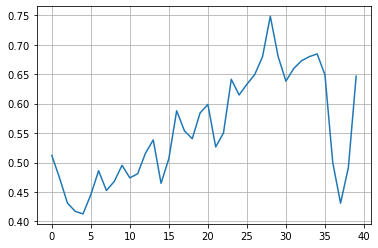

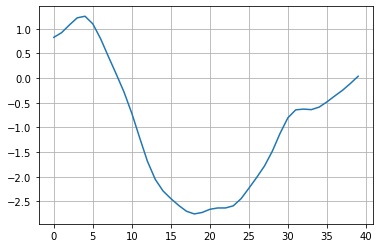

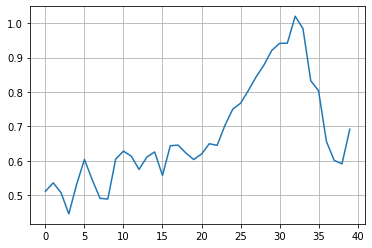

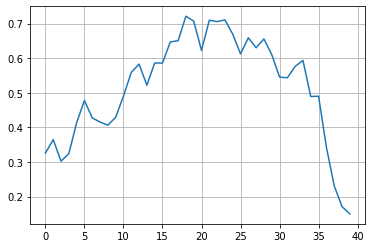

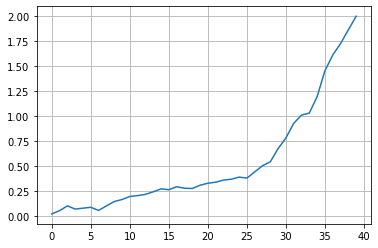

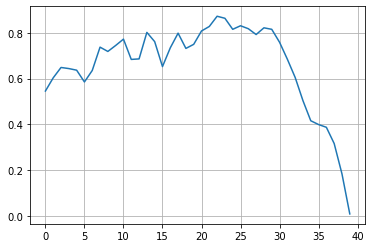

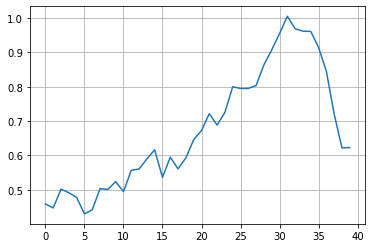

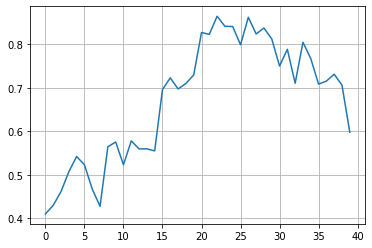

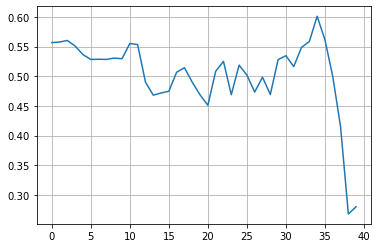

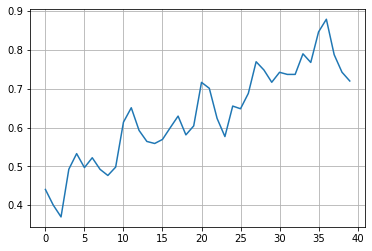

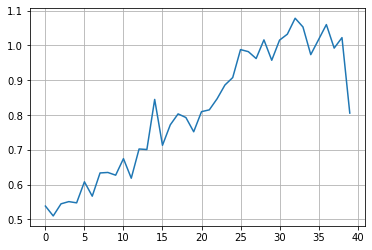

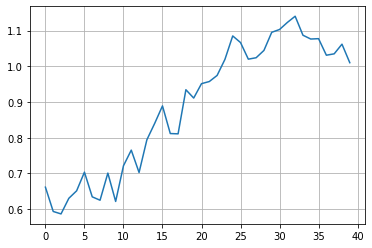

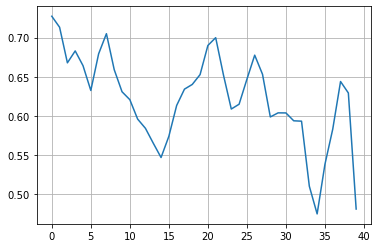

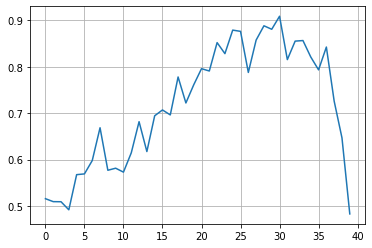

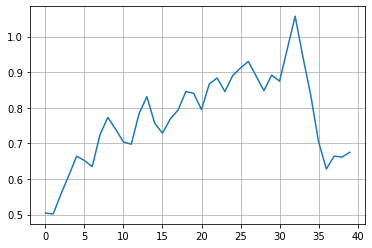

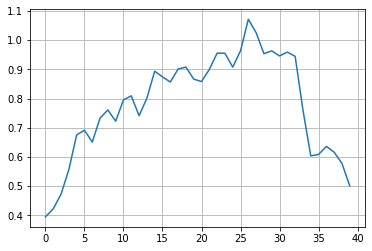

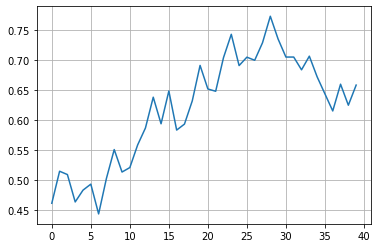

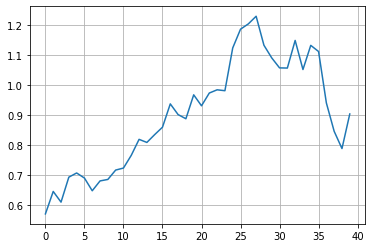

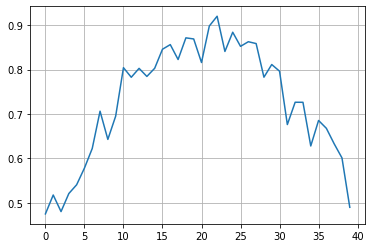

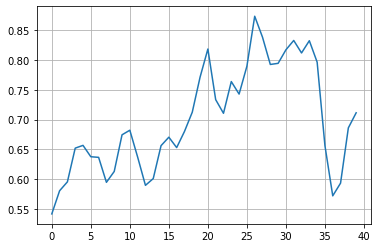

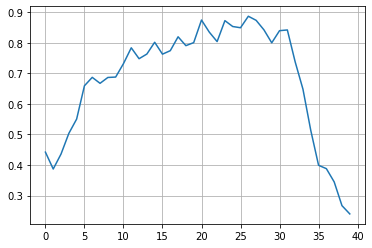

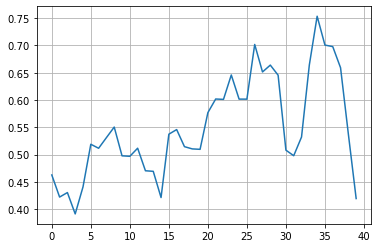

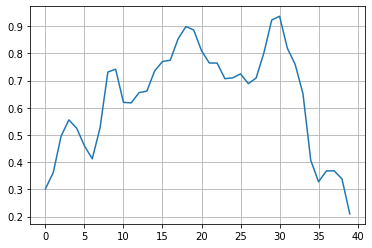

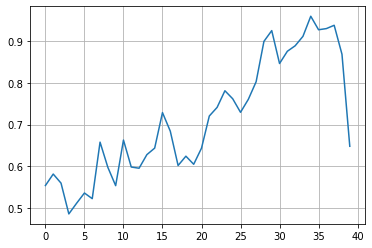

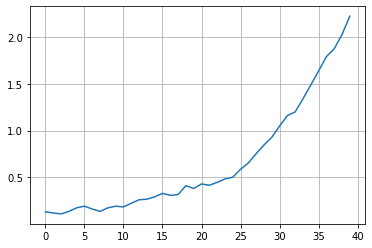

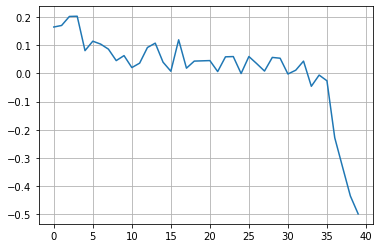

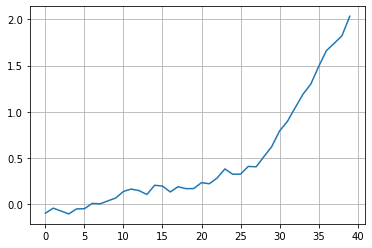

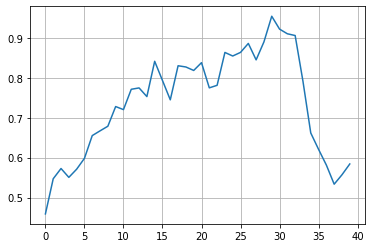

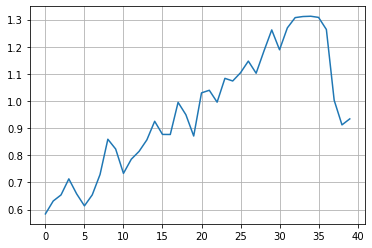

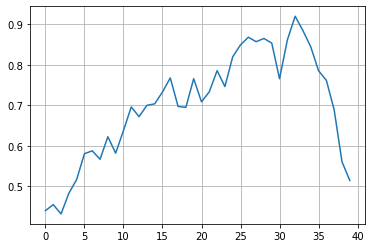

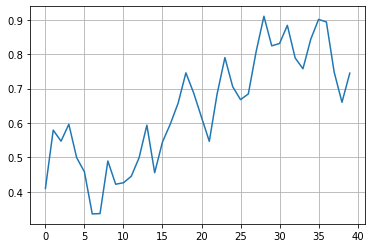

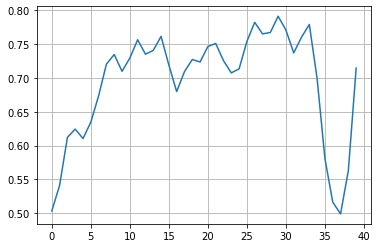

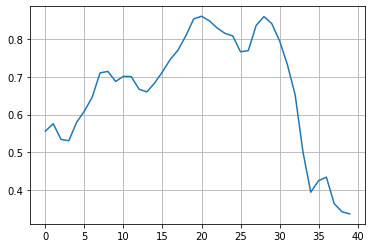

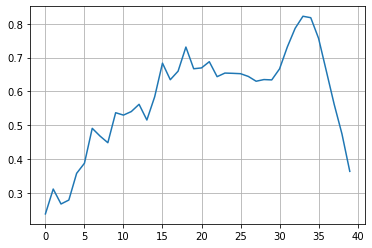

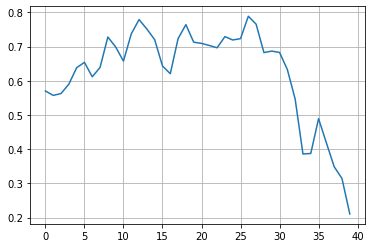

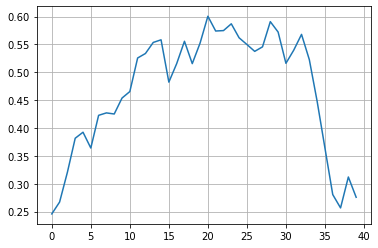

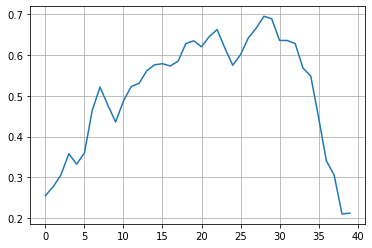

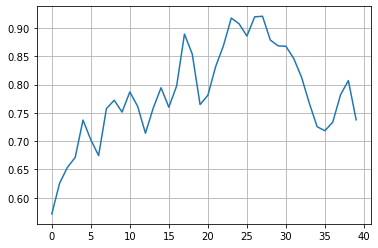

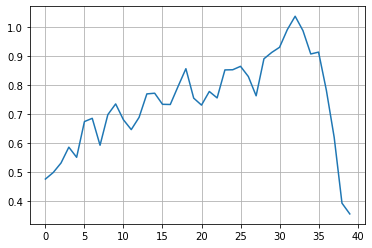

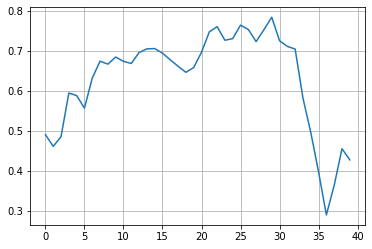

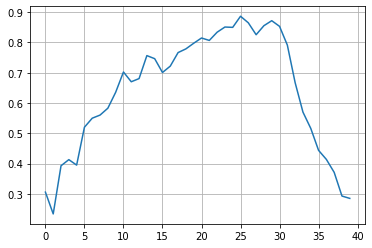

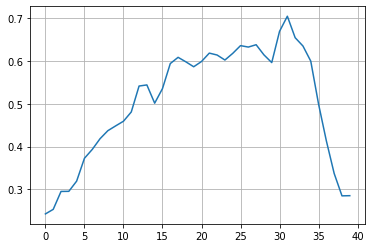

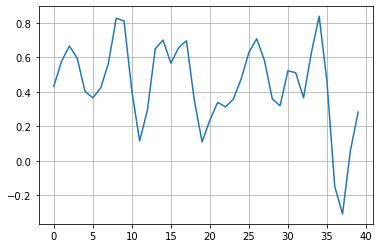

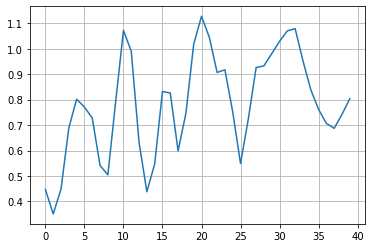

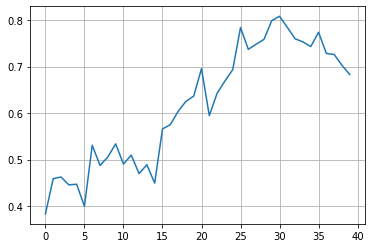

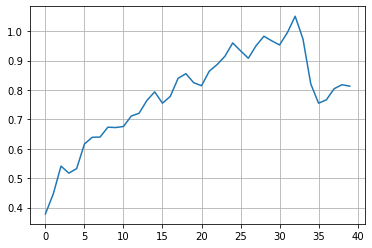

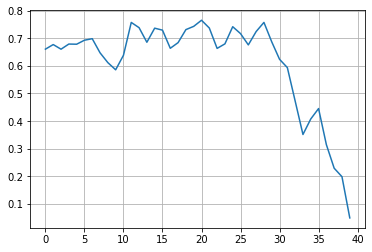

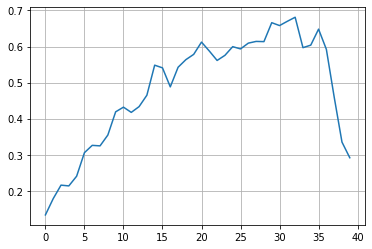

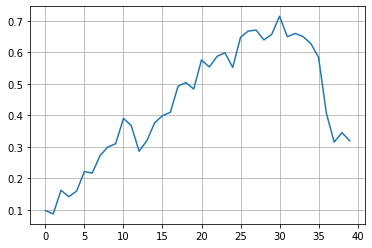

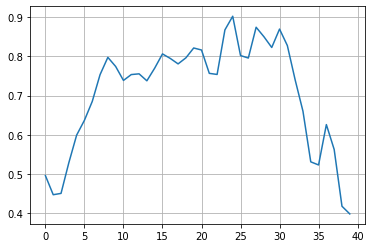

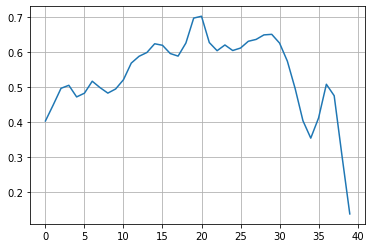

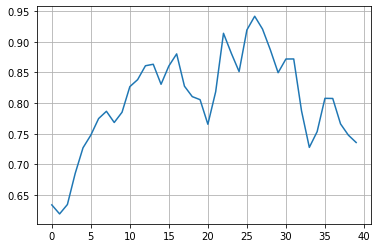

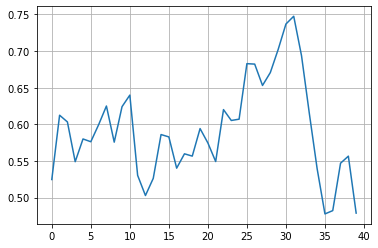

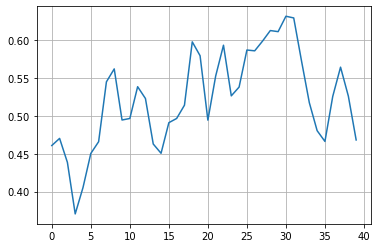

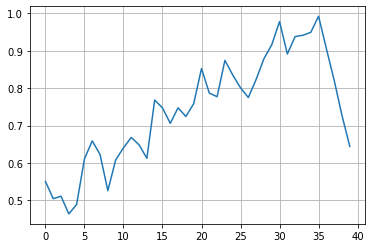

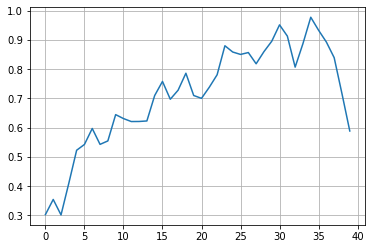

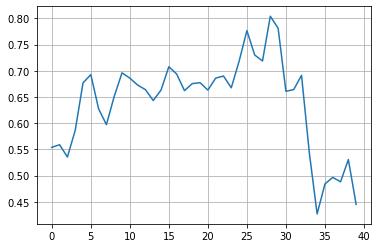

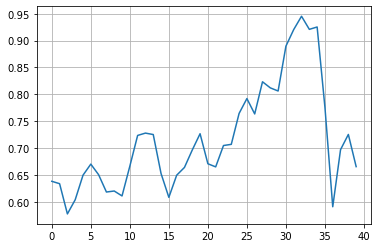

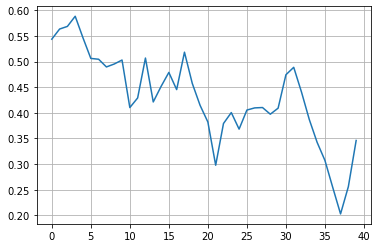

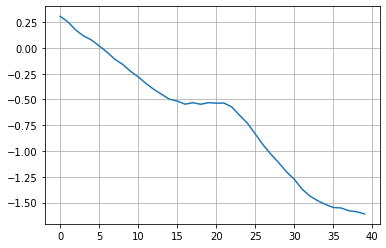

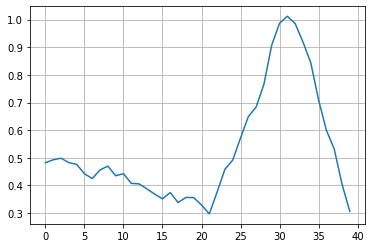

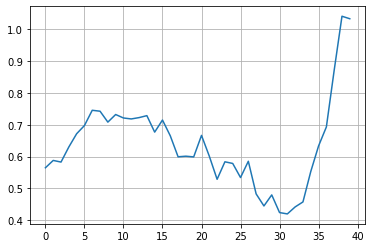

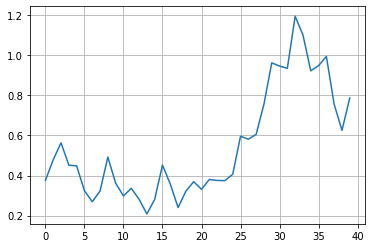

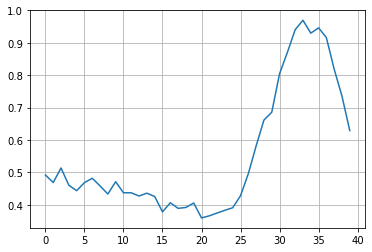

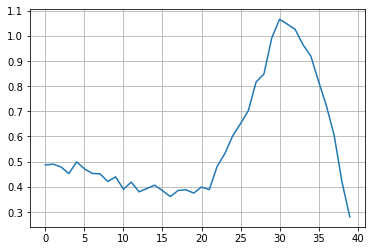

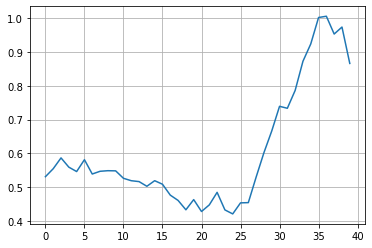

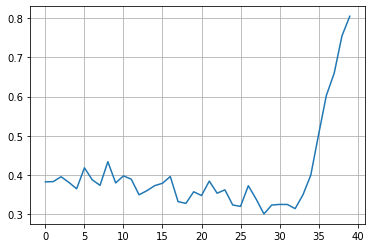

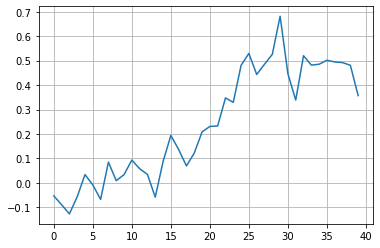

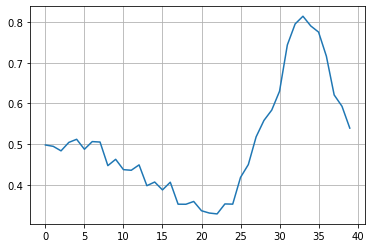

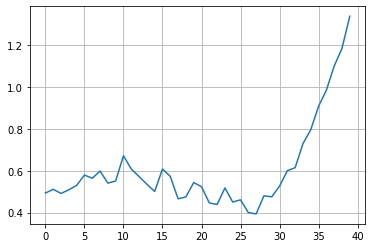

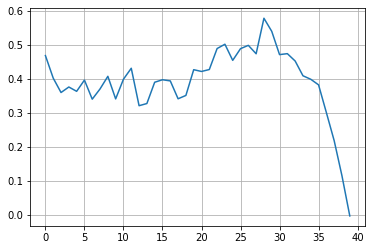

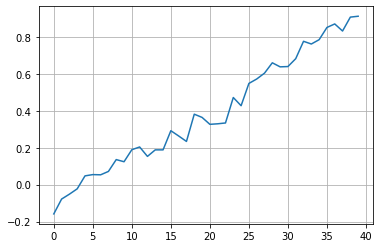

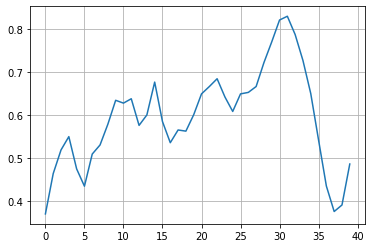

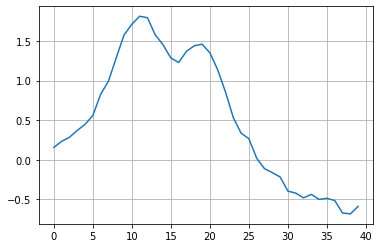

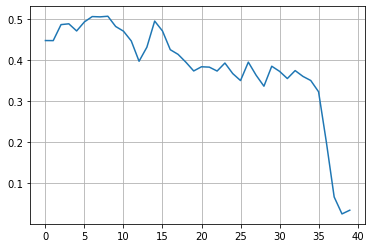

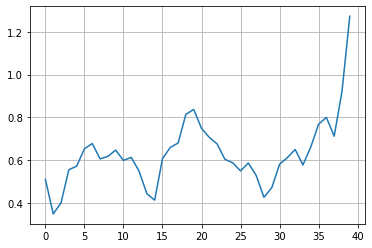

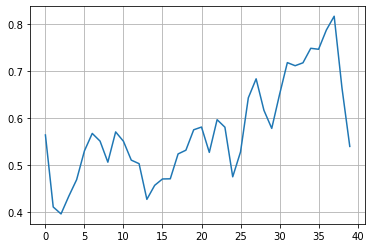

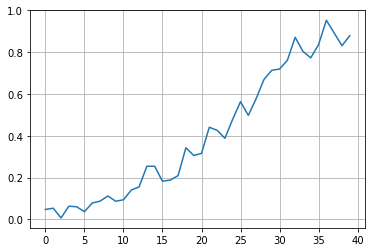

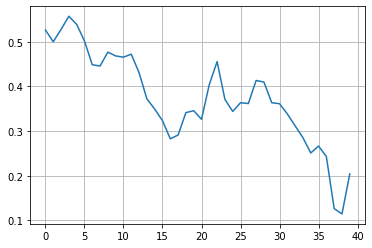

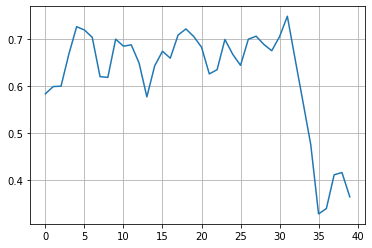

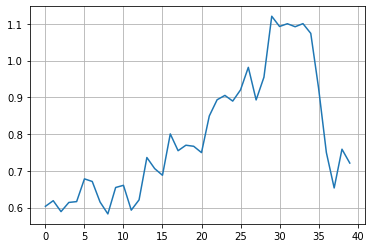

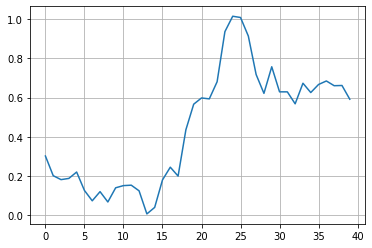

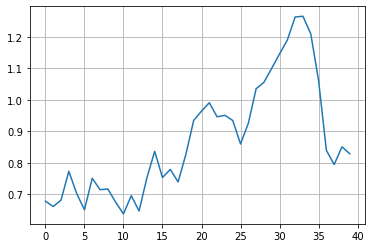

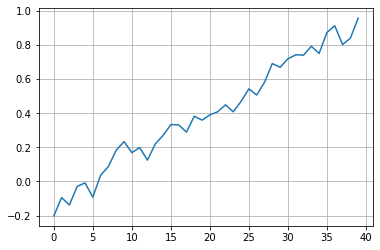

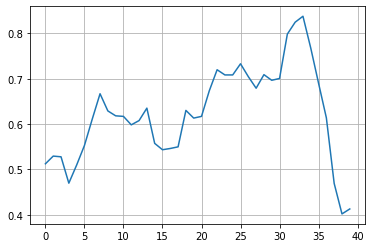

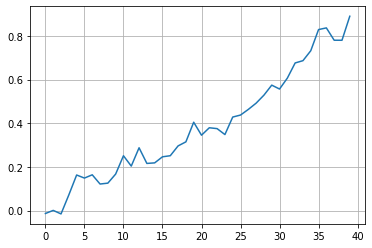

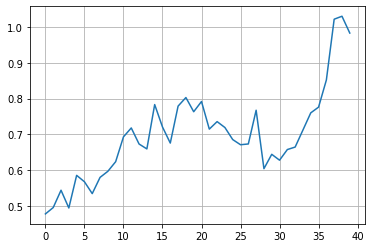

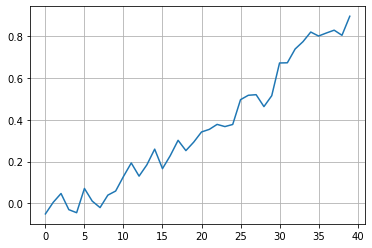

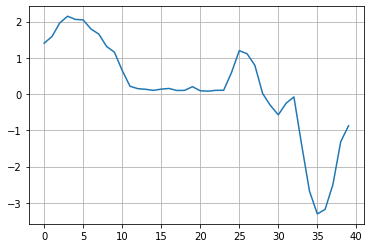

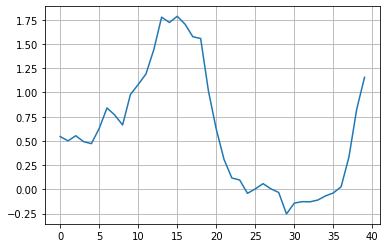

In [10]:
count1=0
for i in range(500):
    if y[i]==0:
        count1+=1
        plt.figure()
        plt.plot(x[i])
        plt.grid()

<ipython-input-11-2057717be49a>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


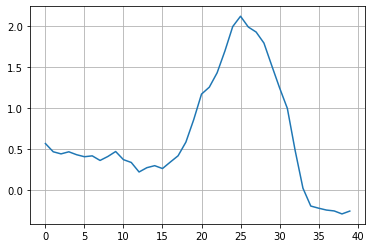

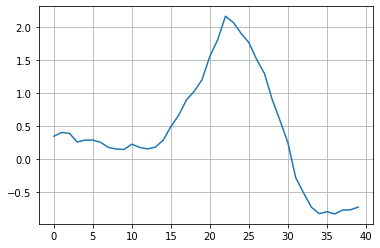

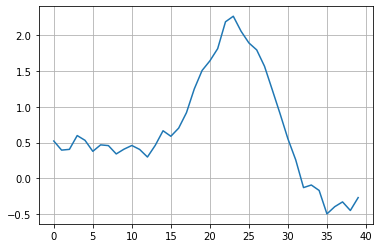

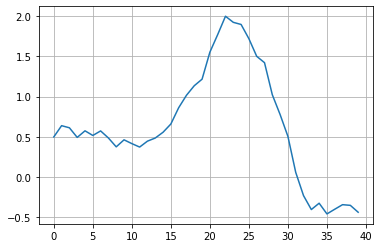

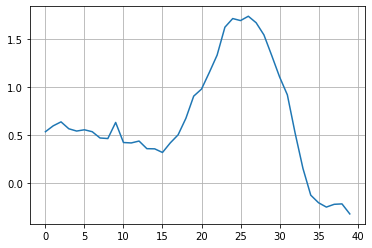

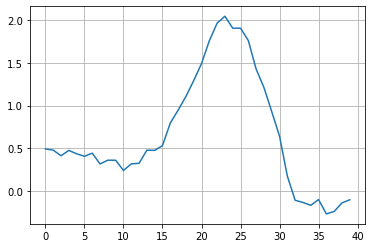

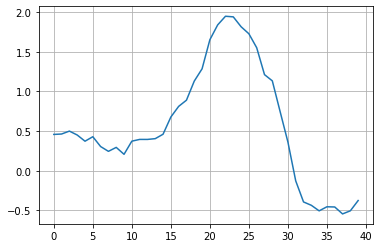

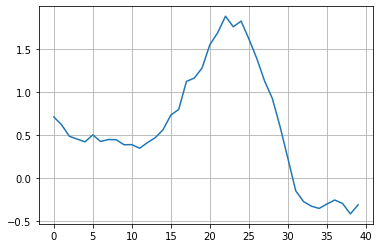

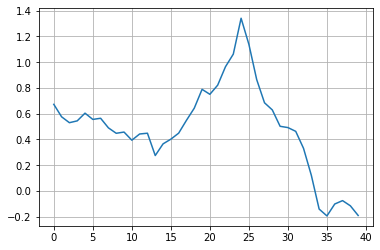

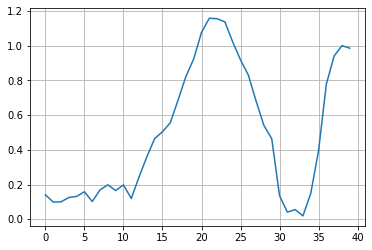

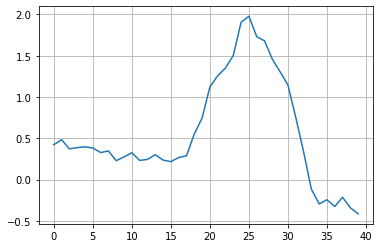

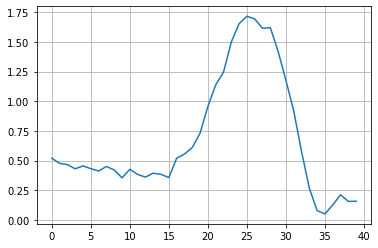

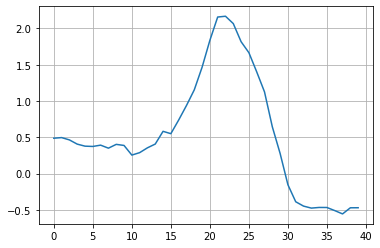

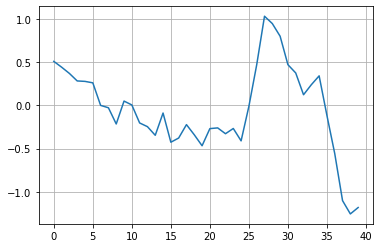

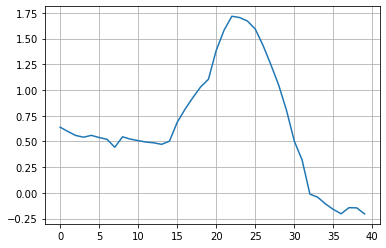

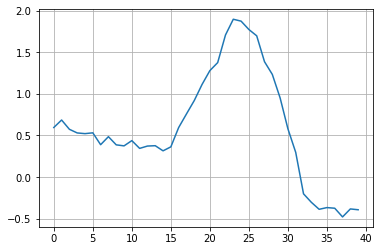

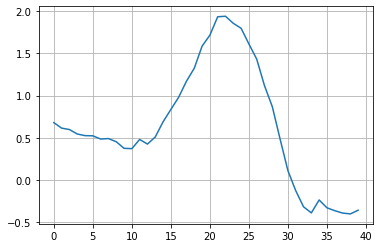

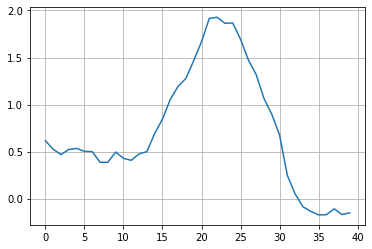

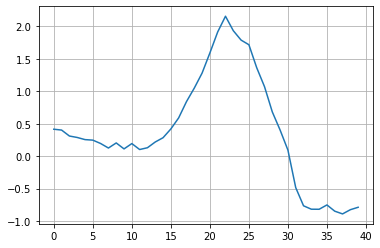

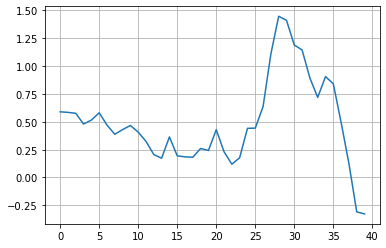

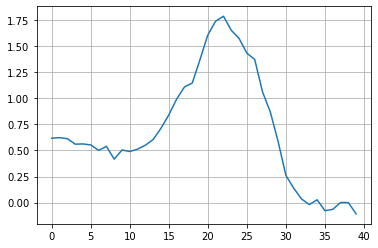

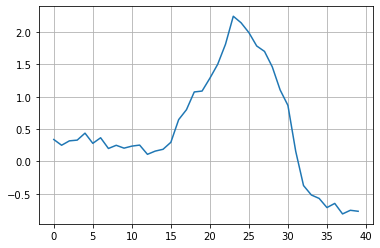

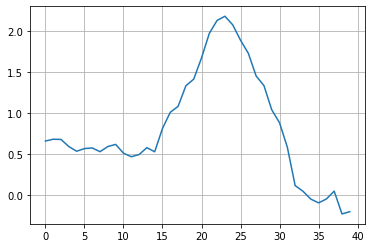

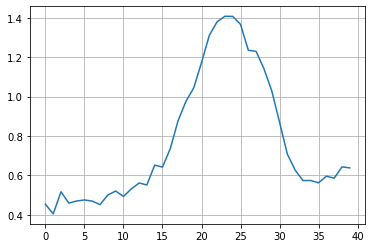

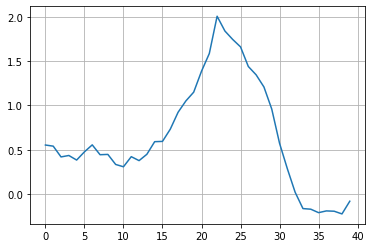

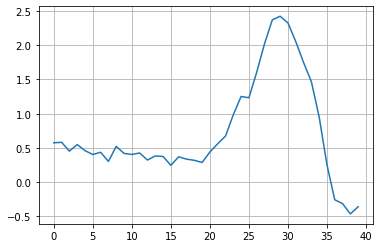

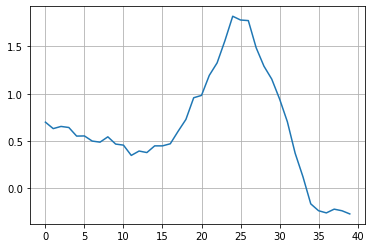

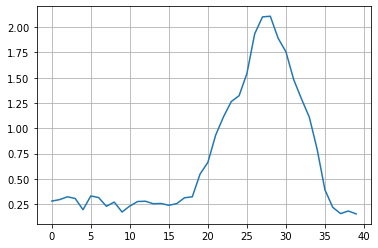

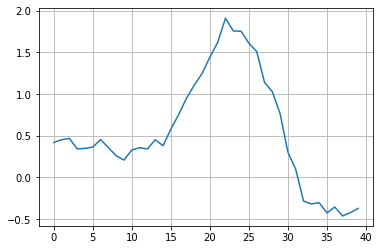

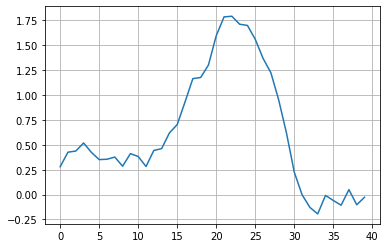

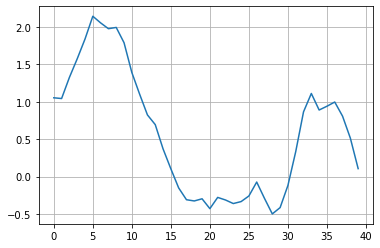

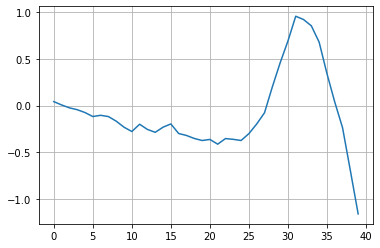

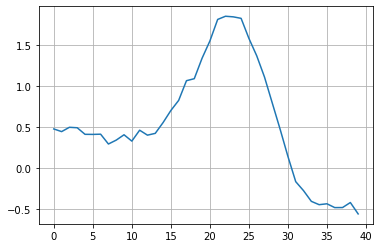

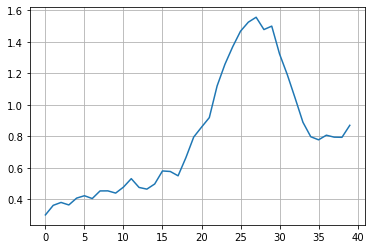

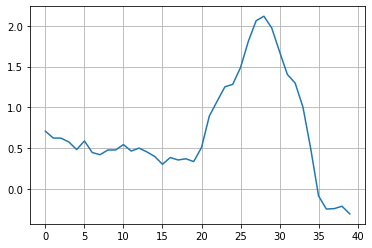

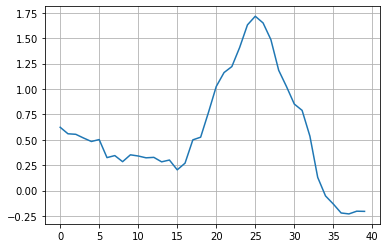

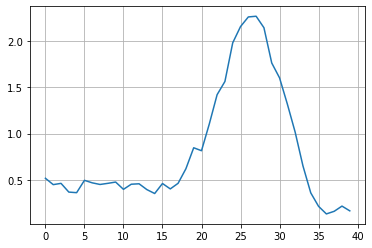

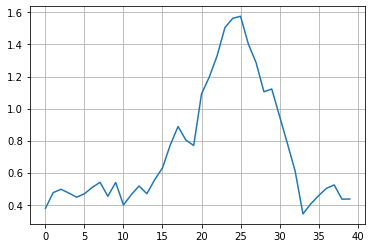

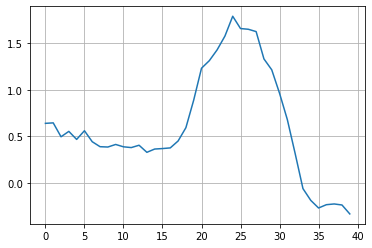

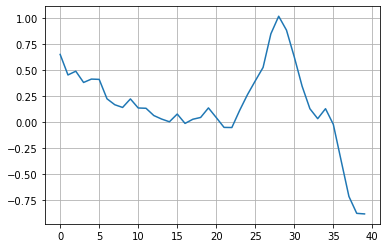

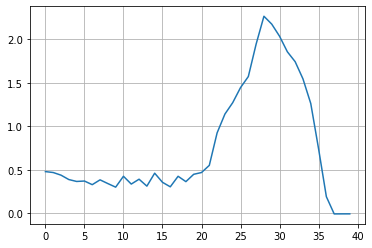

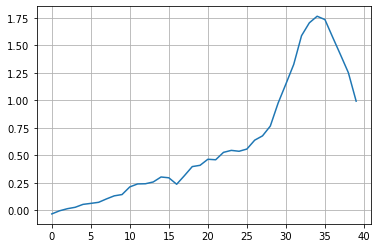

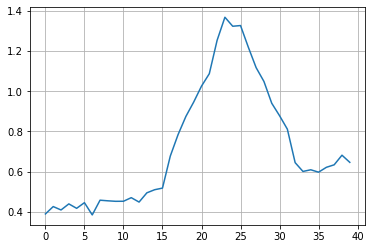

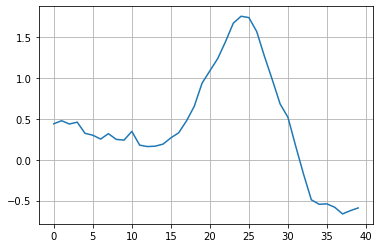

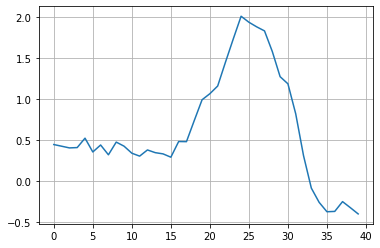

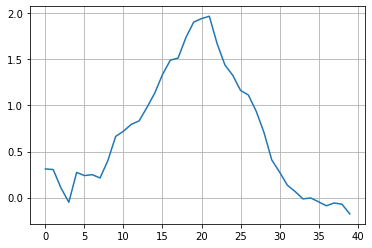

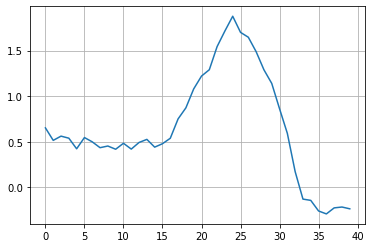

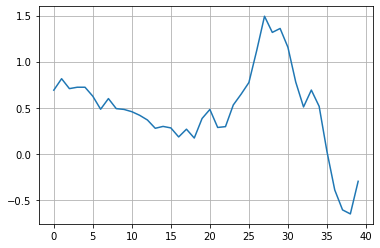

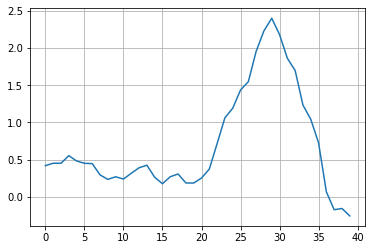

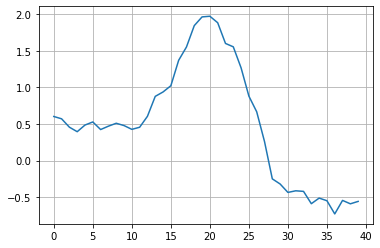

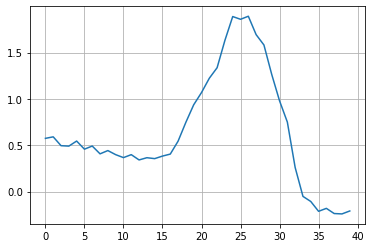

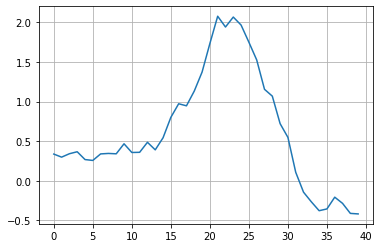

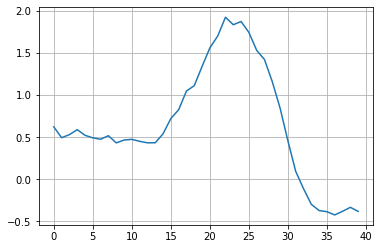

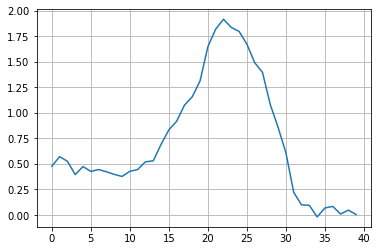

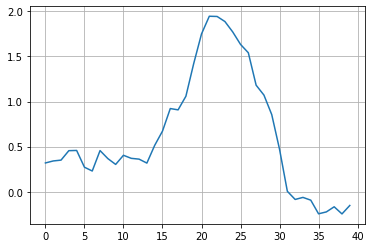

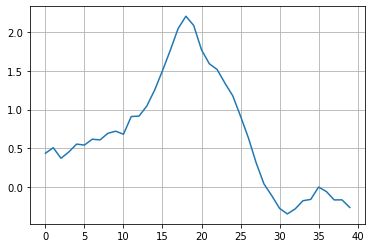

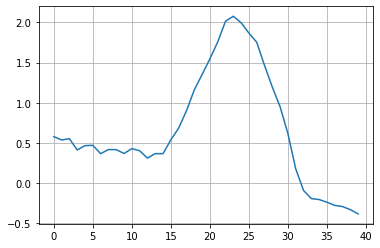

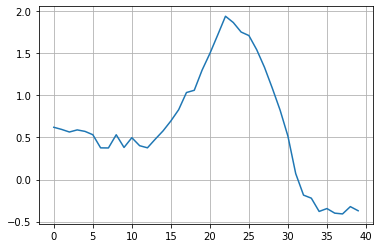

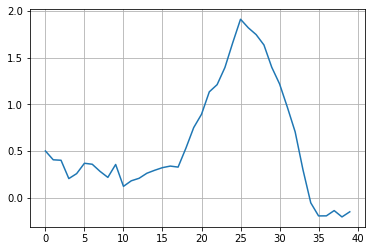

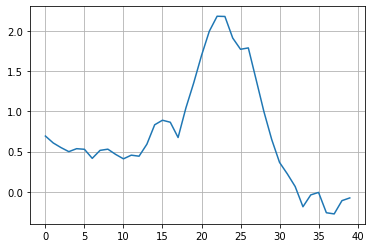

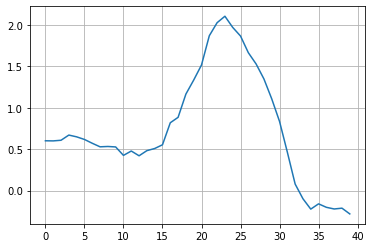

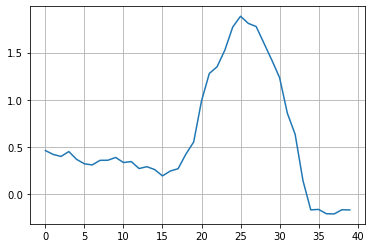

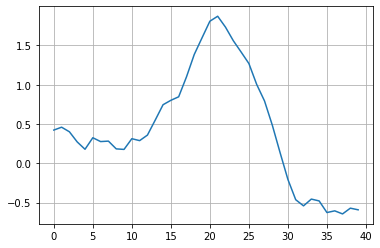

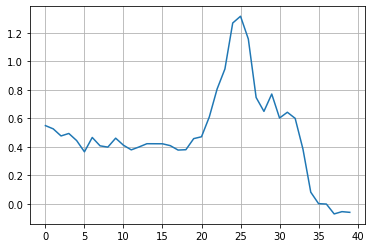

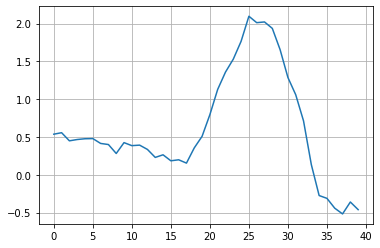

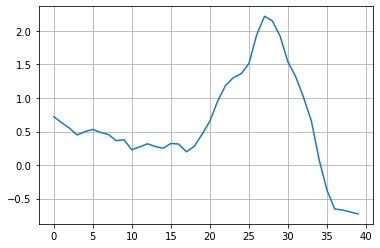

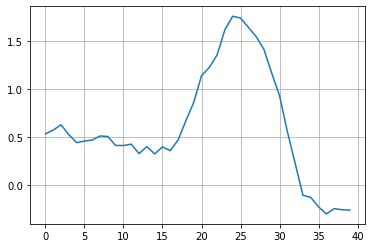

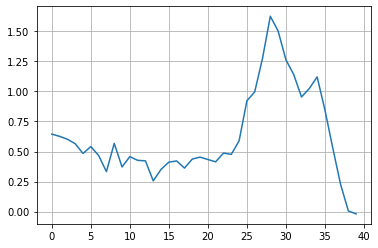

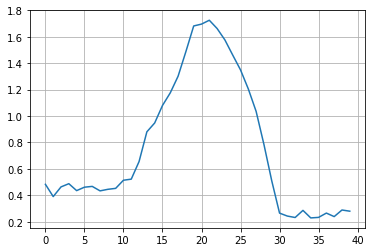

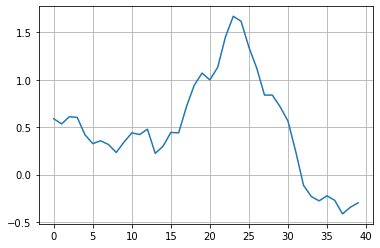

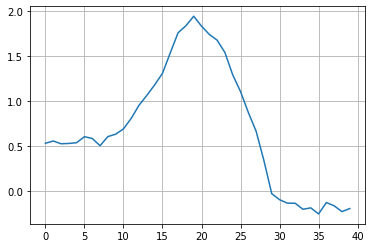

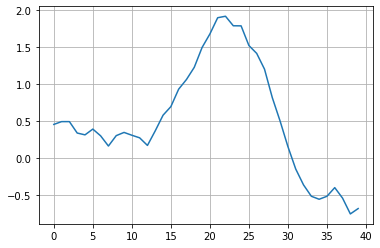

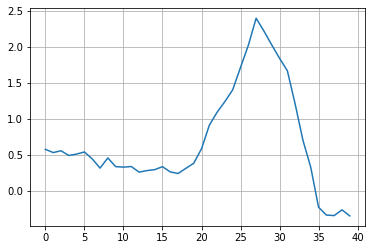

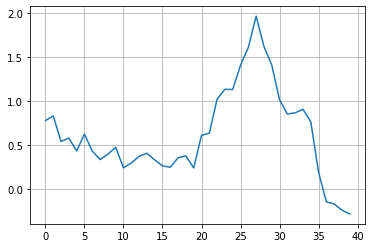

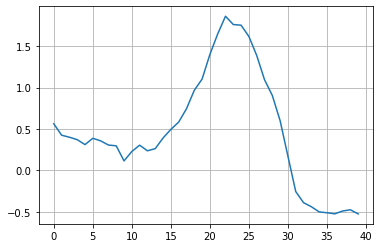

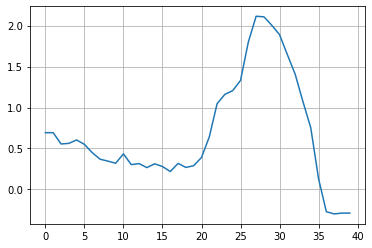

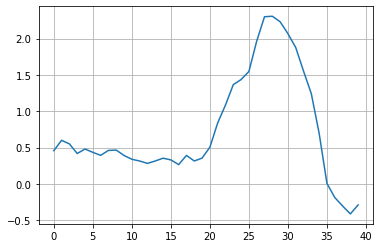

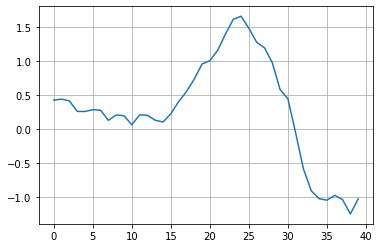

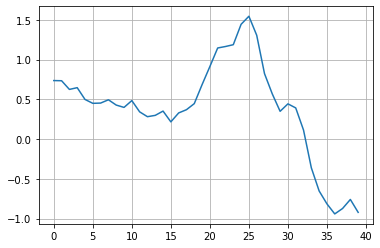

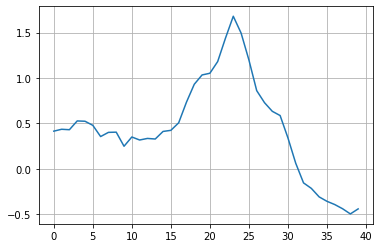

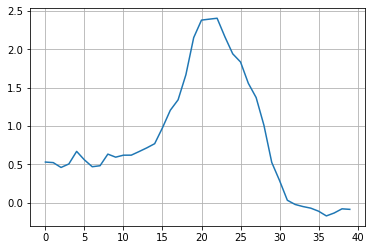

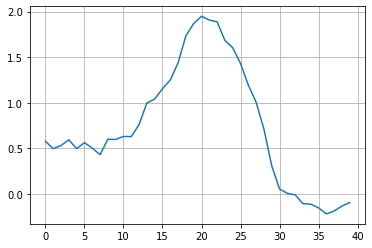

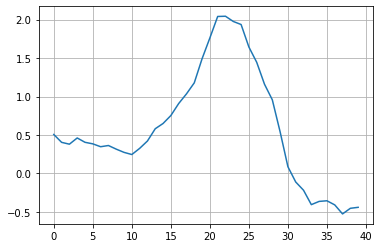

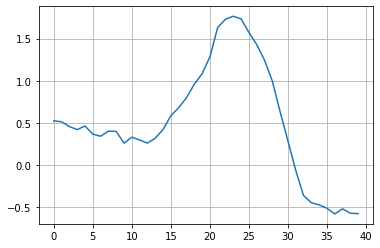

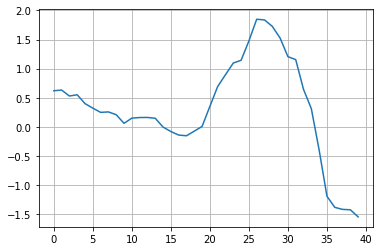

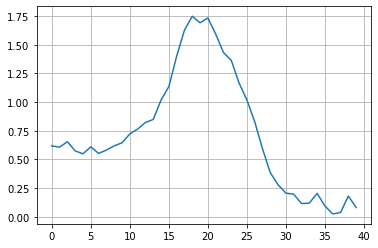

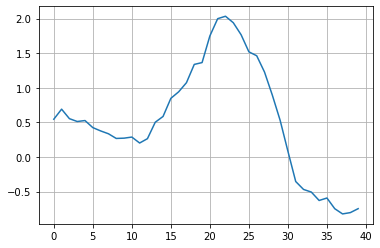

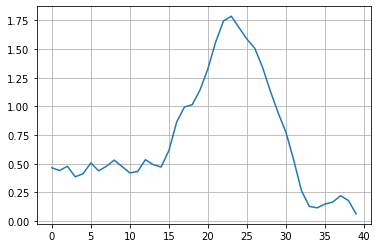

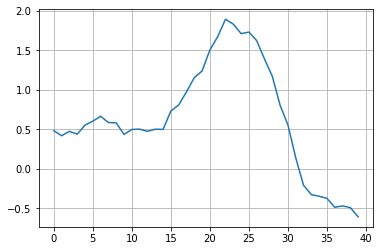

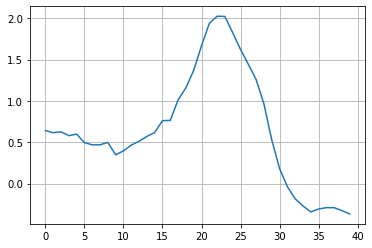

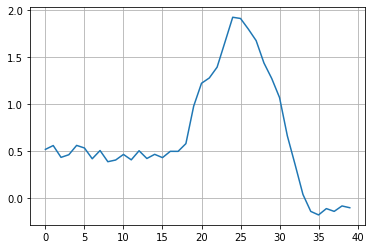

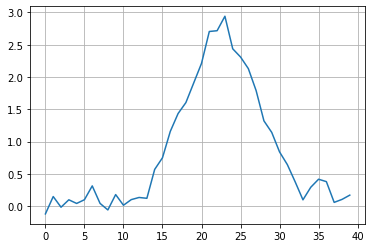

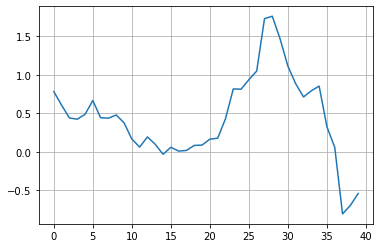

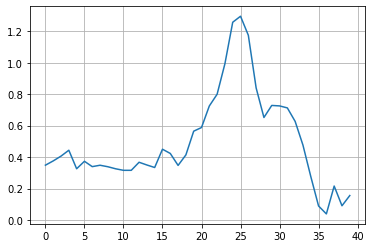

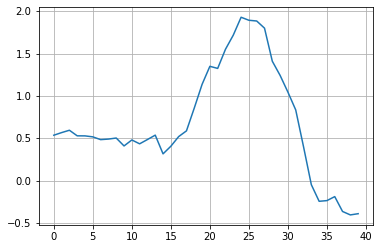

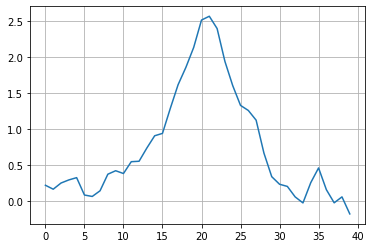

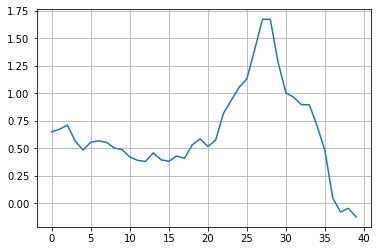

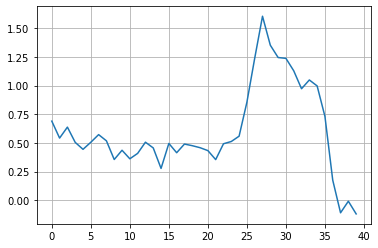

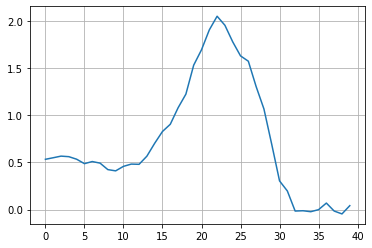

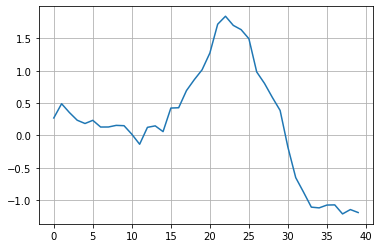

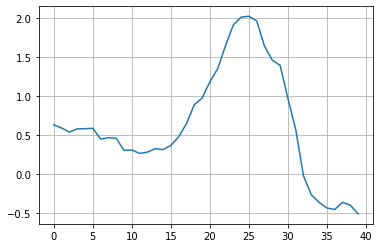

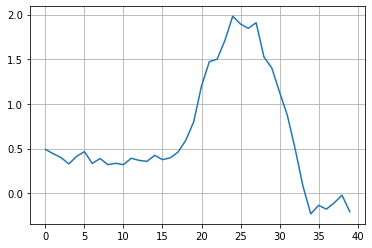

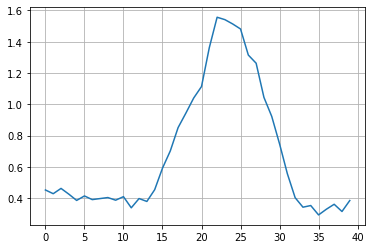

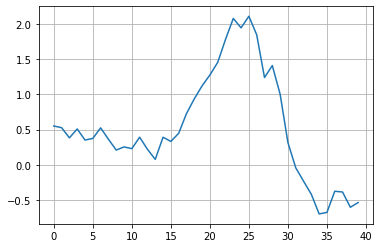

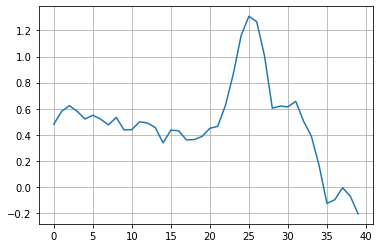

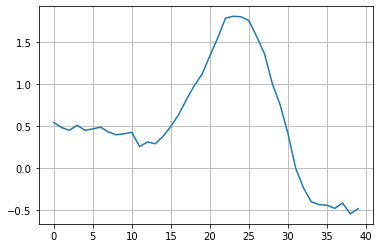

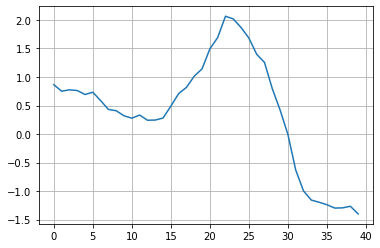

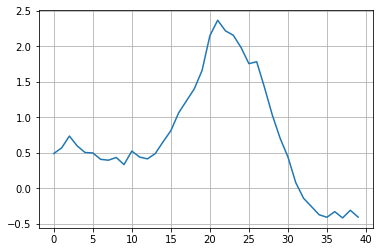

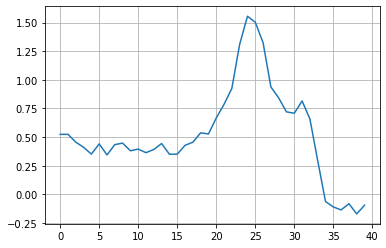

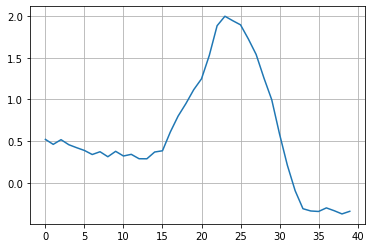

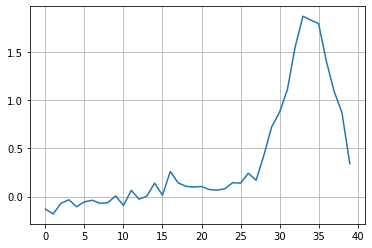

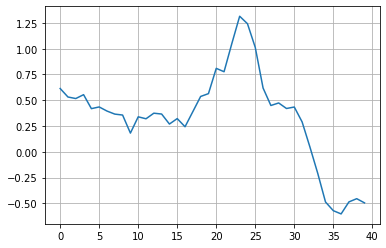

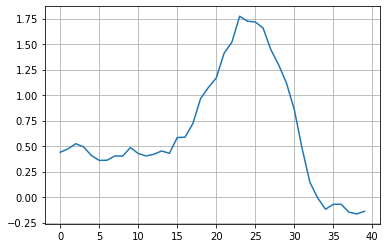

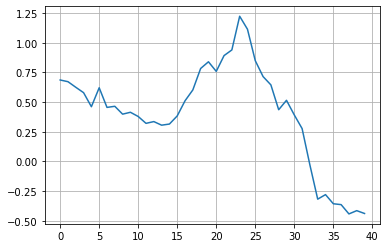

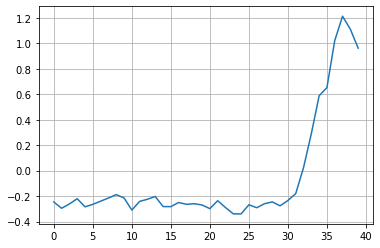

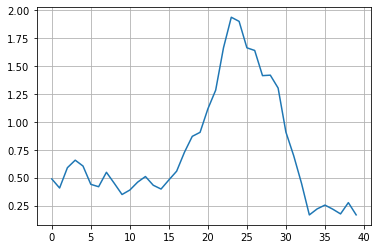

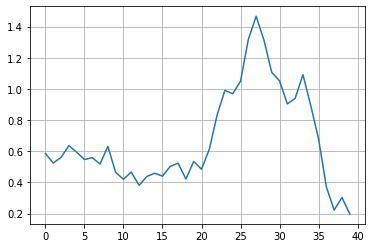

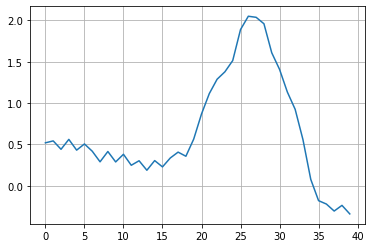

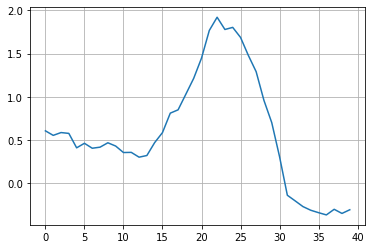

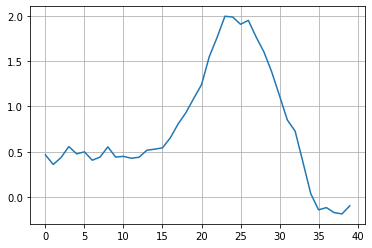

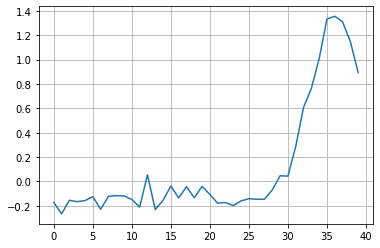

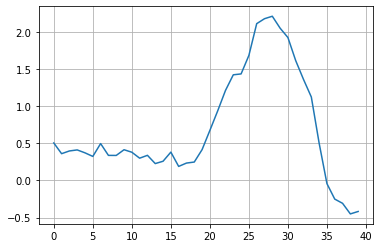

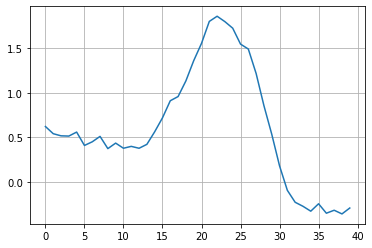

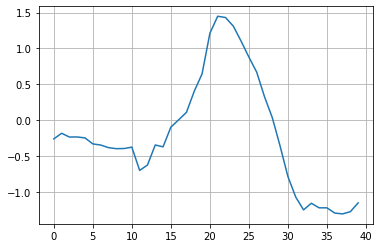

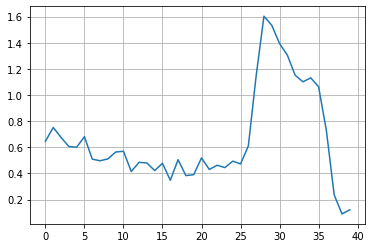

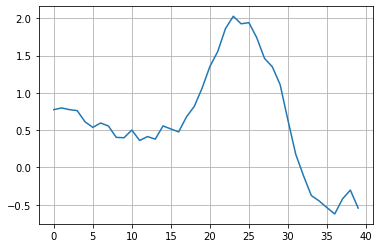

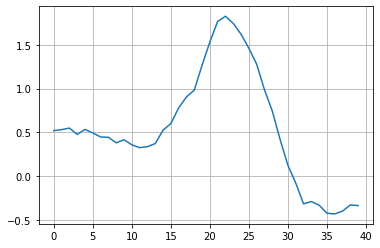

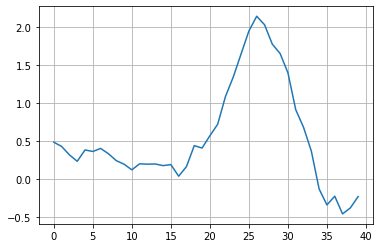

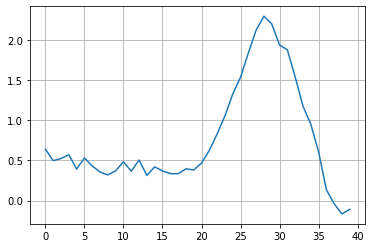

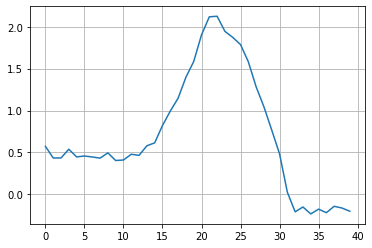

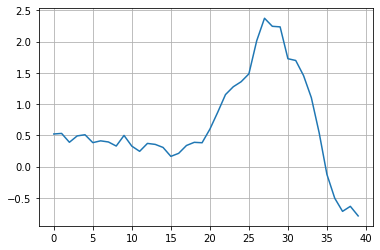

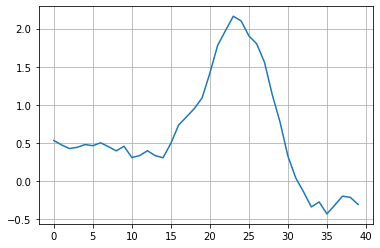

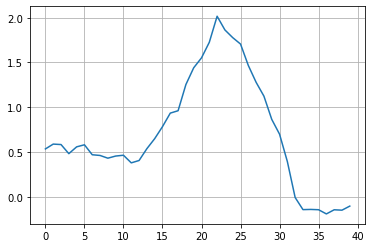

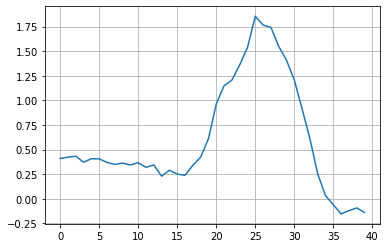

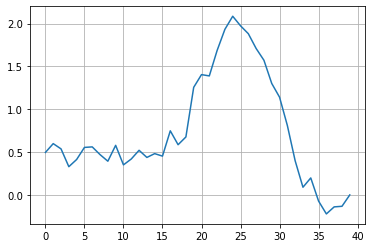

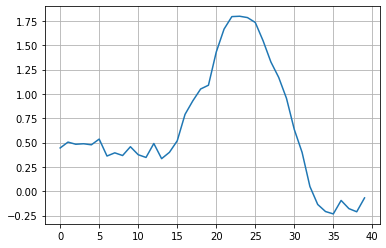

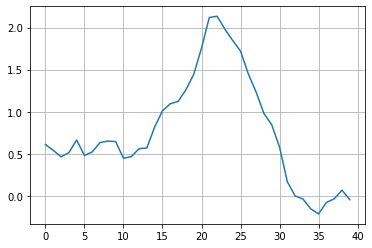

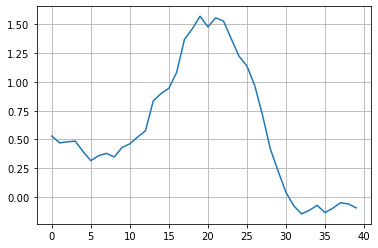

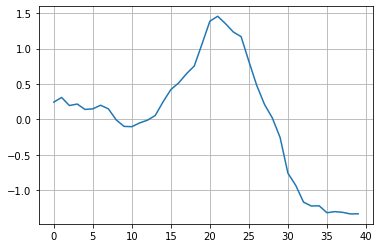

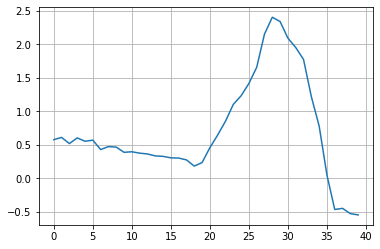

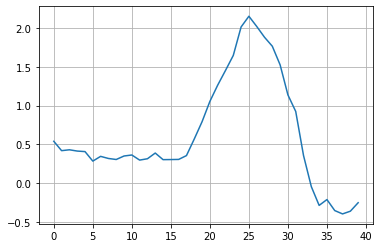

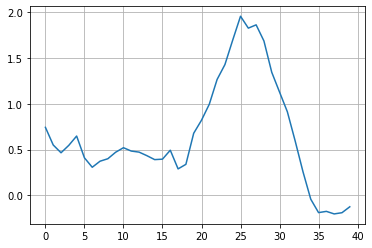

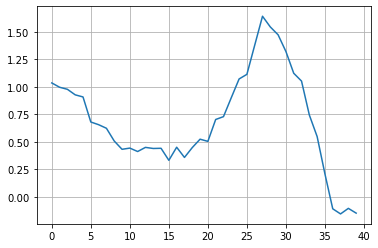

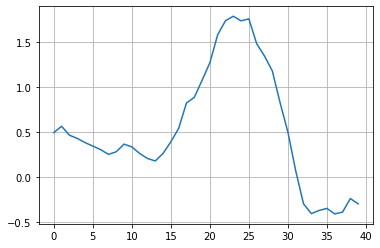

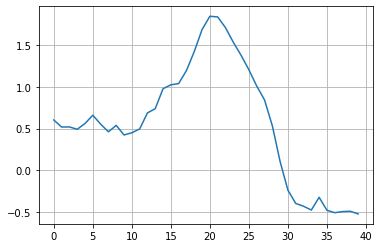

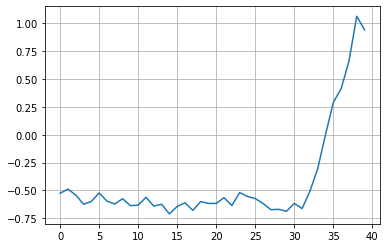

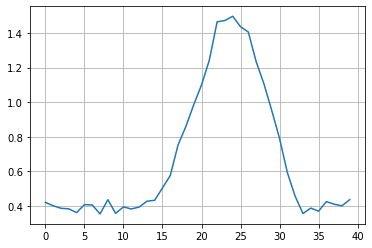

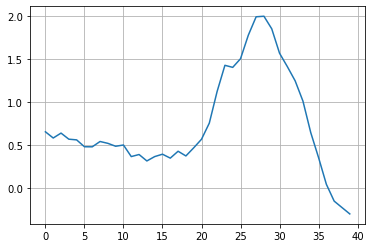

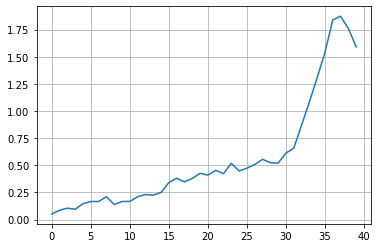

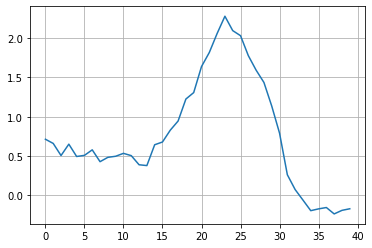

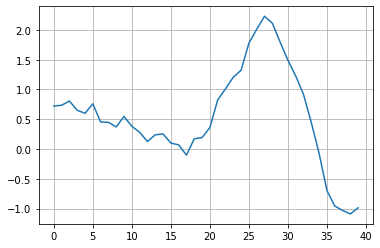

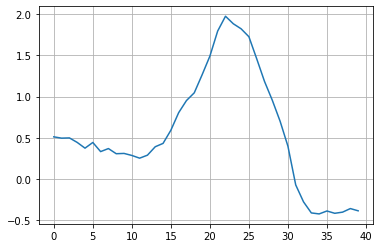

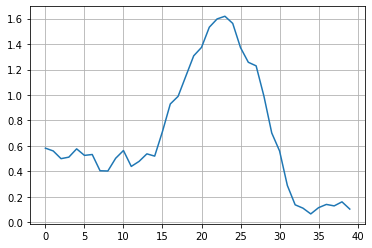

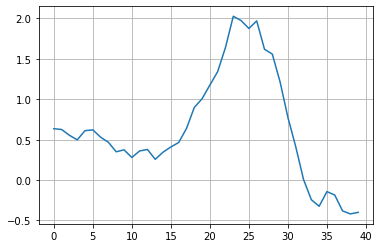

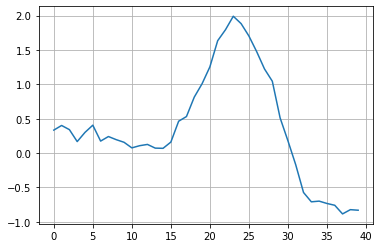

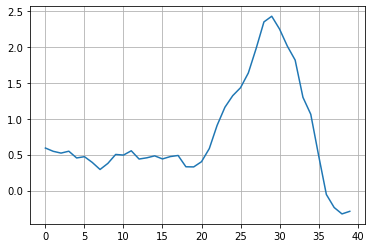

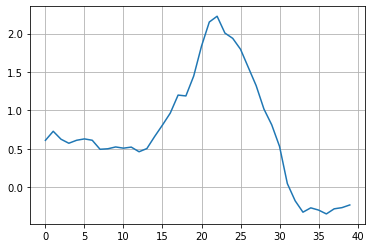

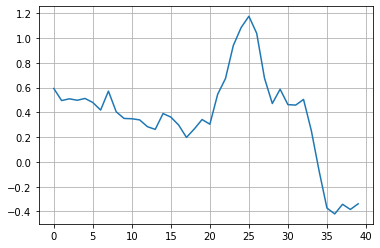

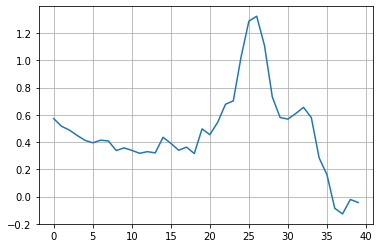

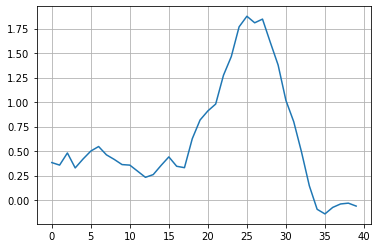

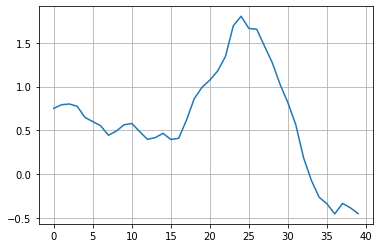

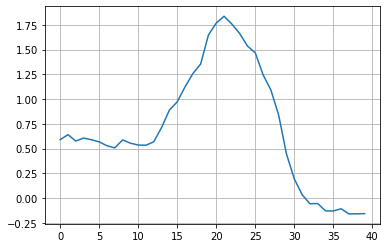

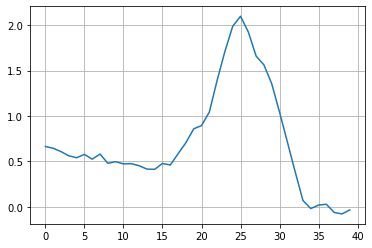

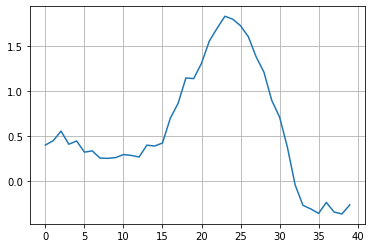

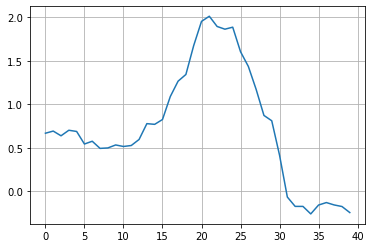

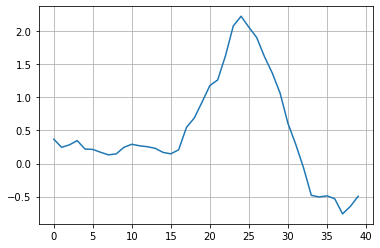

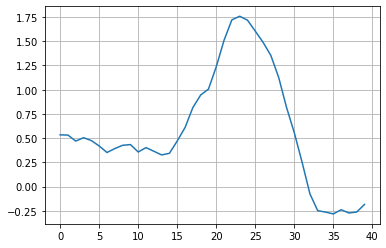

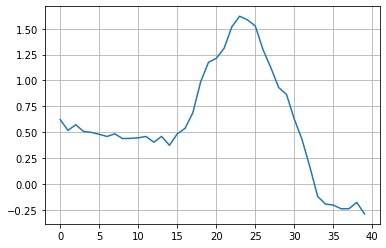

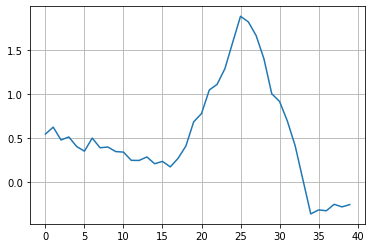

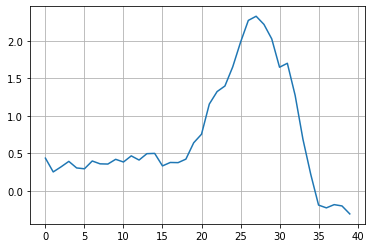

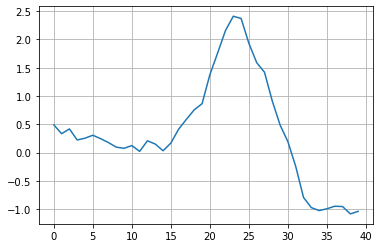

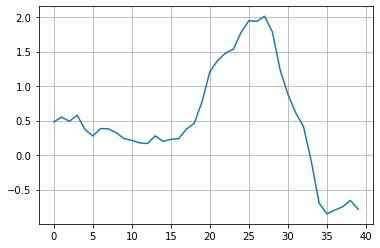

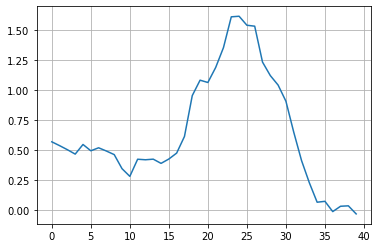

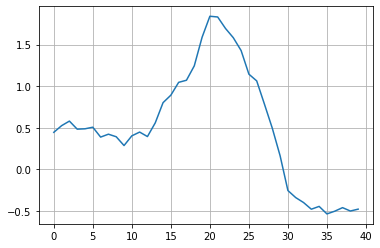

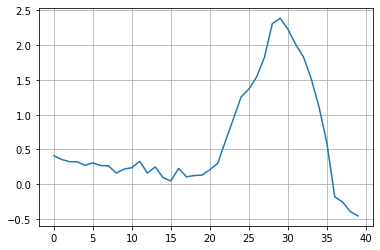

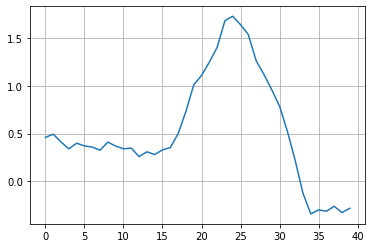

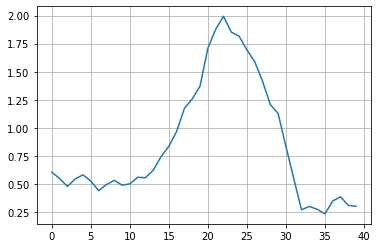

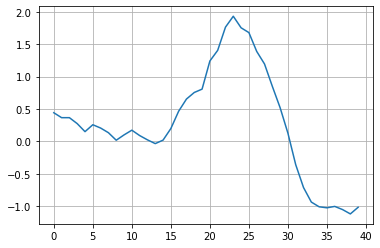

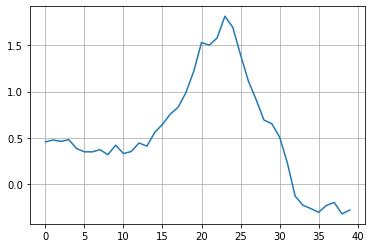

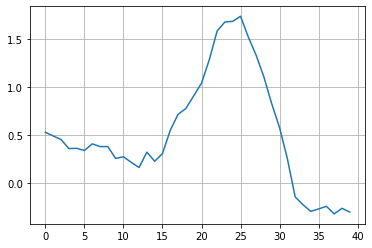

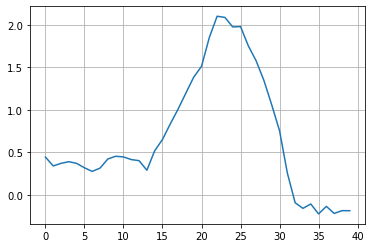

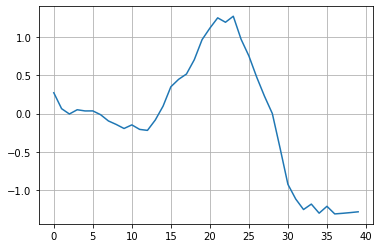

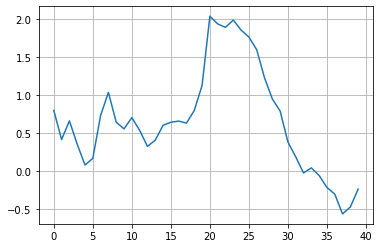

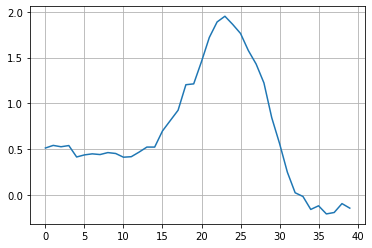

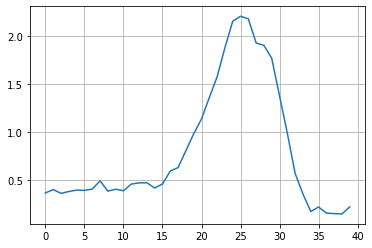

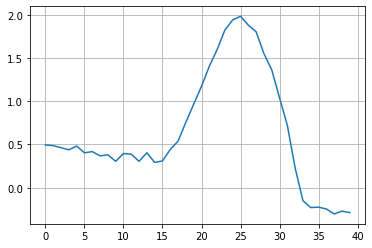

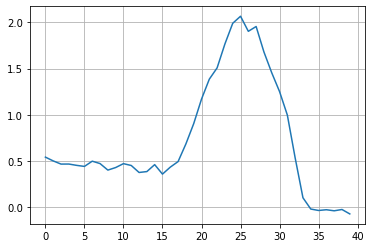

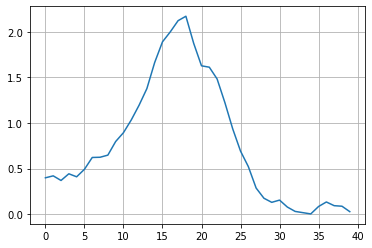

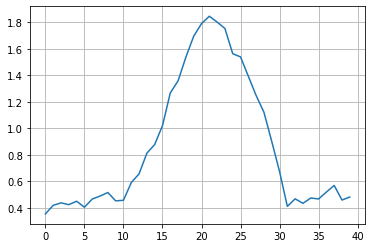

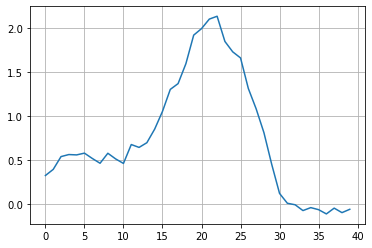

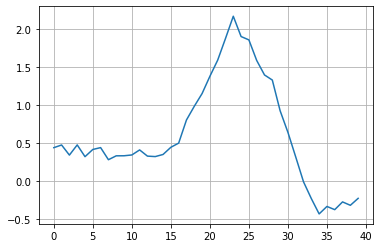

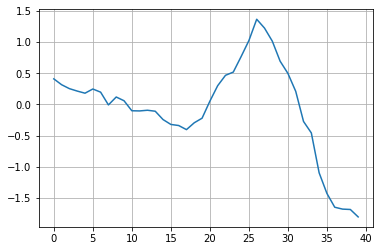

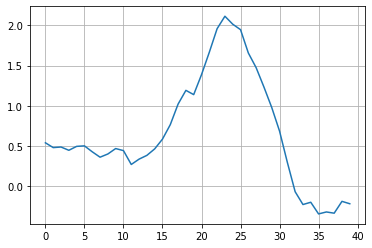

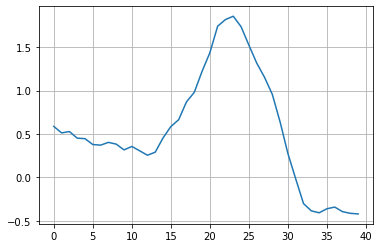

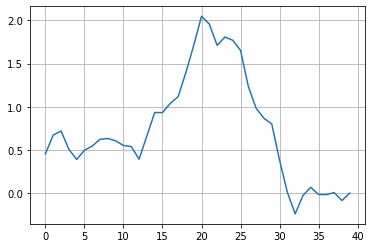

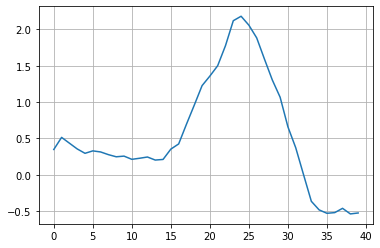

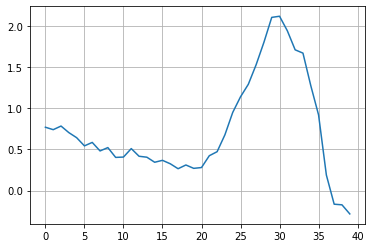

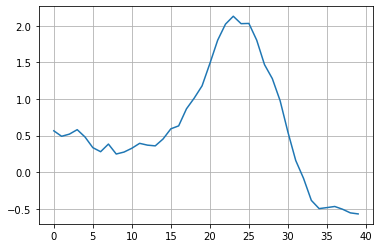

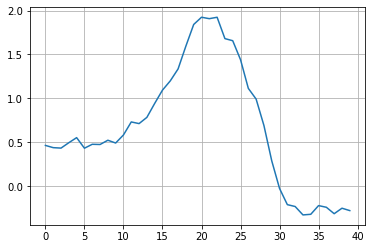

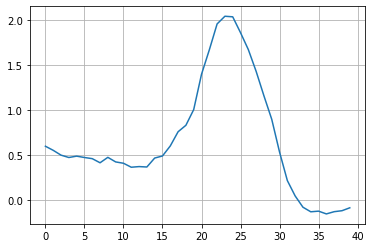

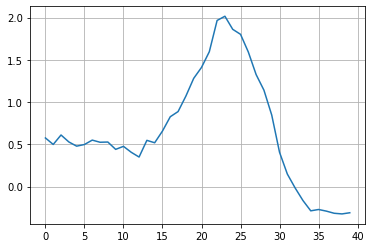

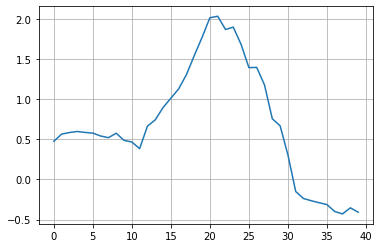

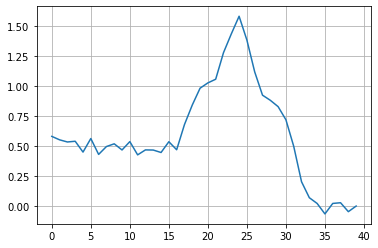

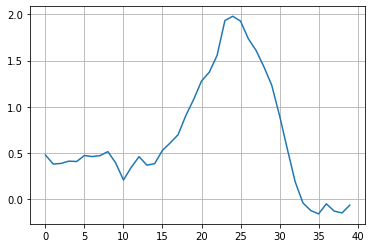

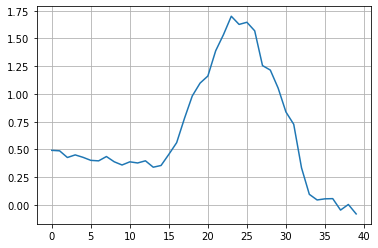

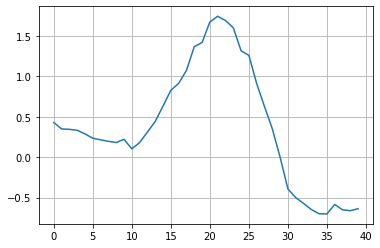

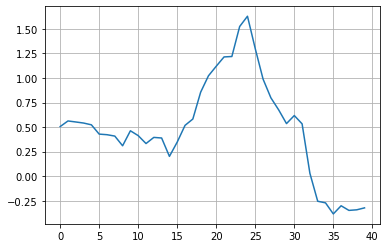

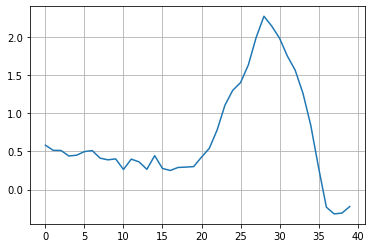

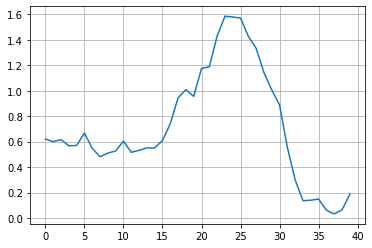

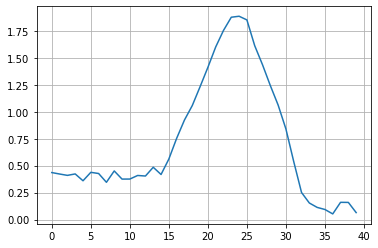

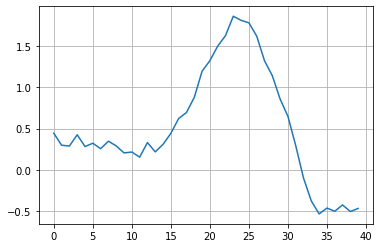

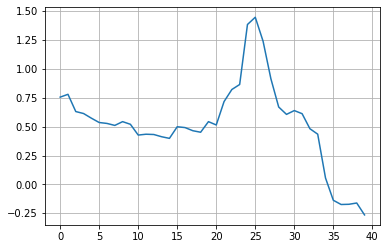

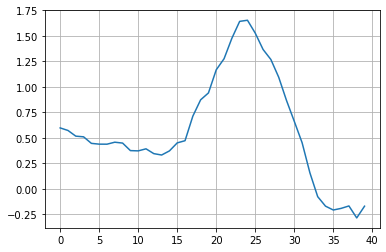

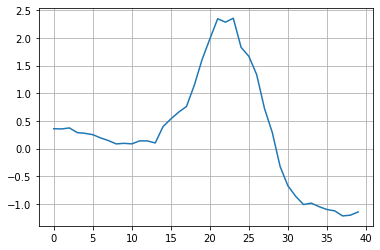

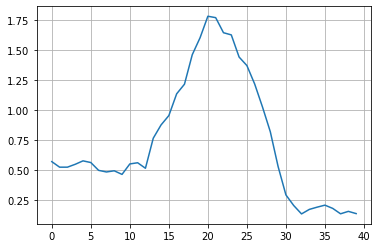

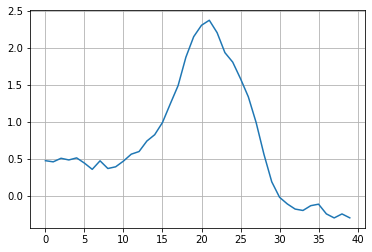

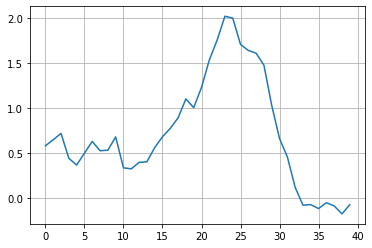

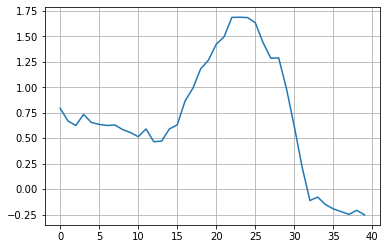

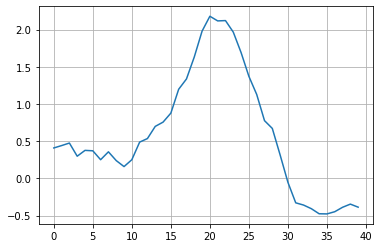

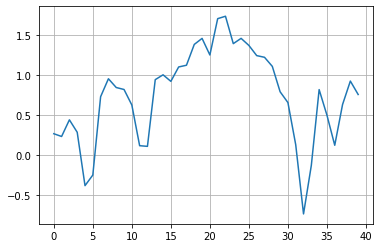

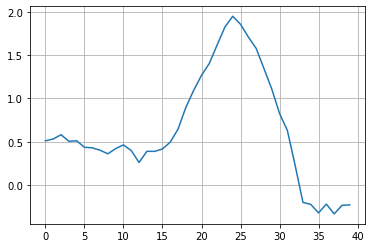

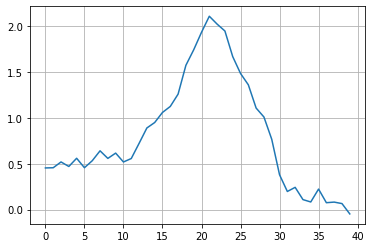

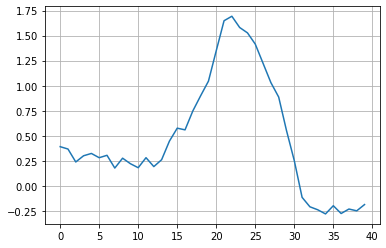

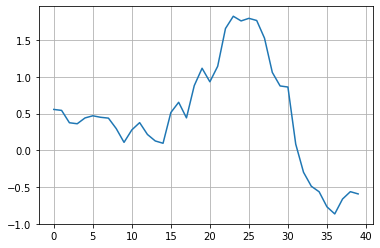

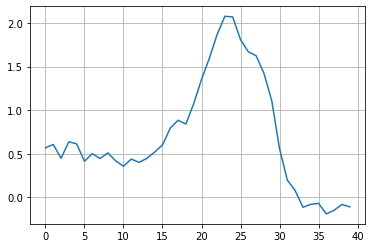

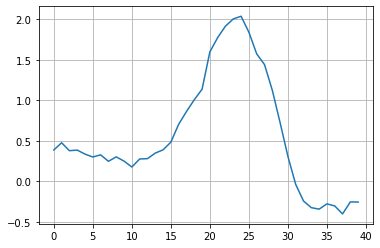

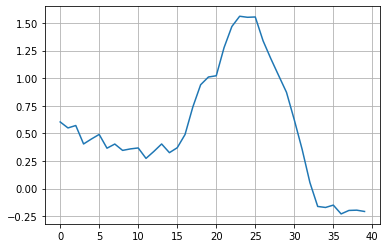

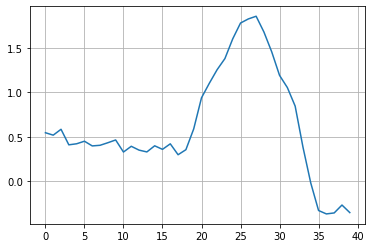

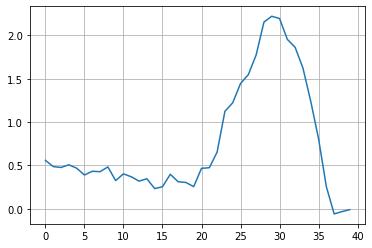

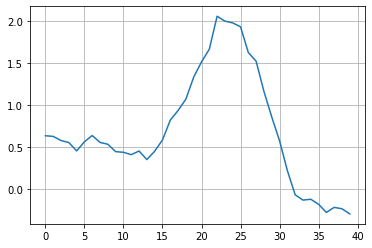

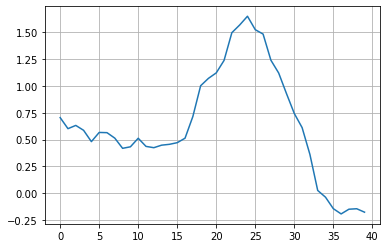

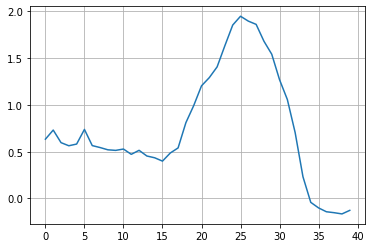

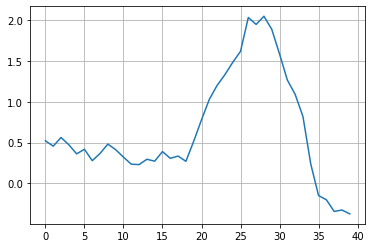

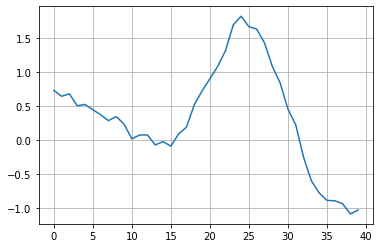

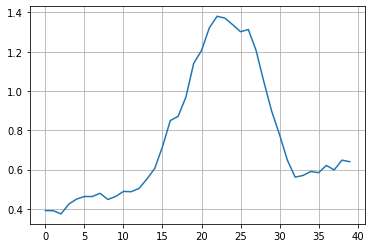

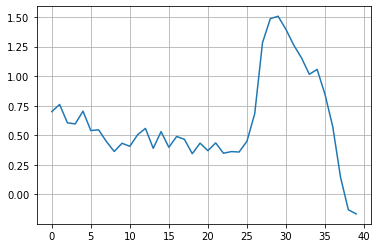

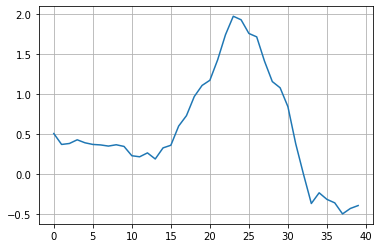

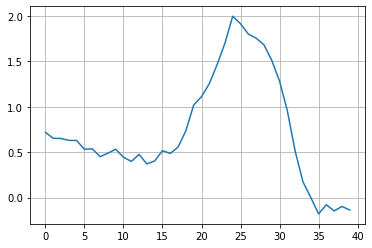

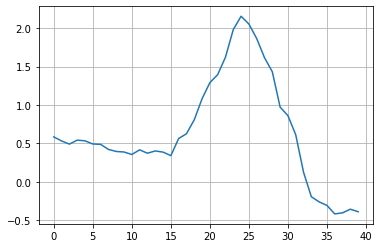

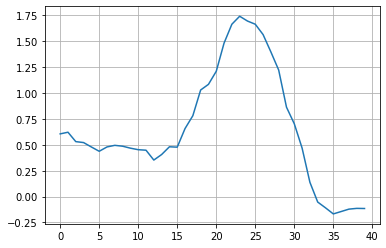

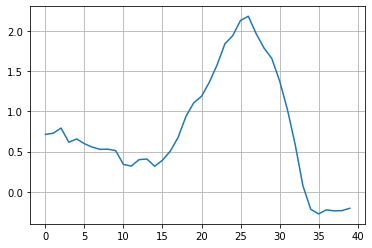

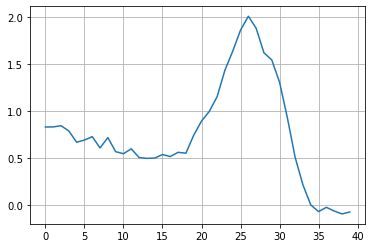

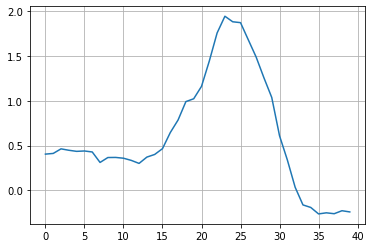

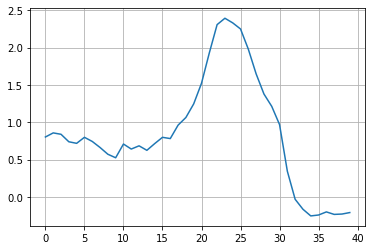

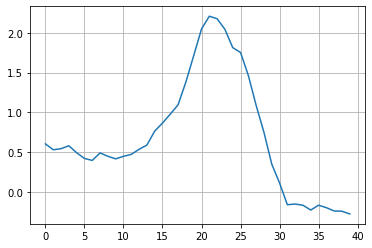

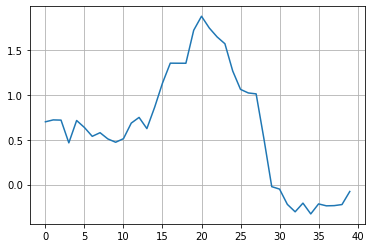

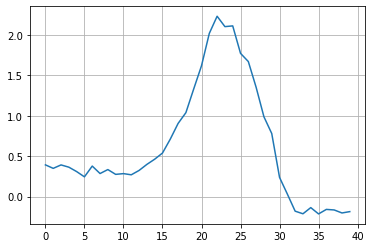

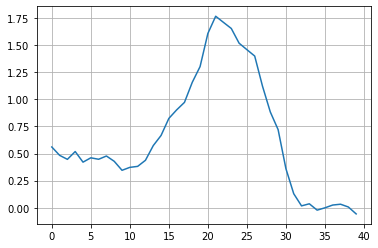

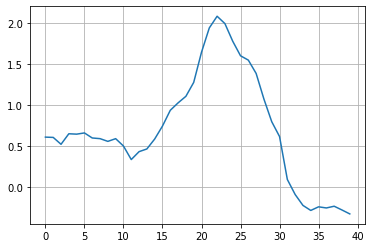

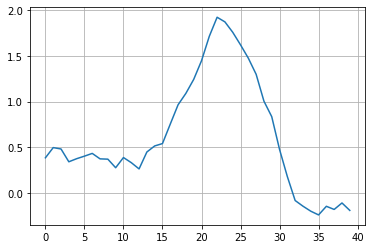

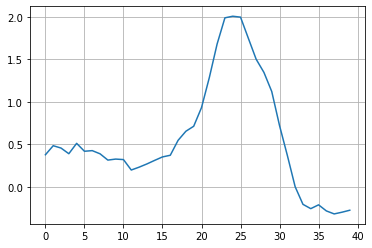

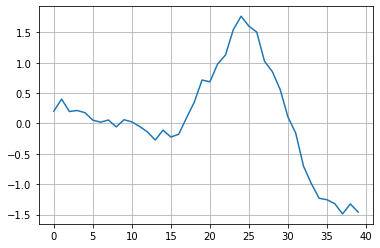

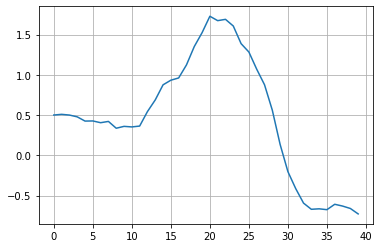

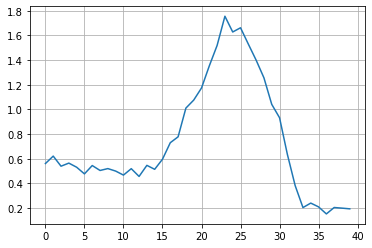

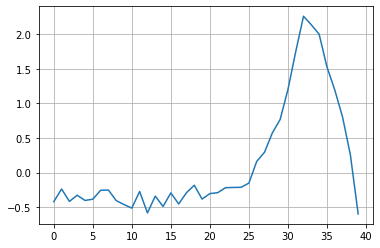

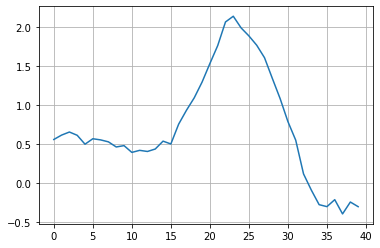

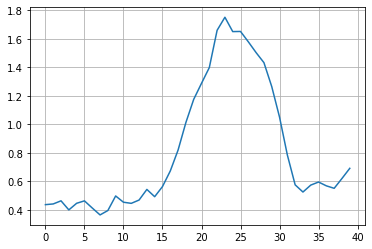

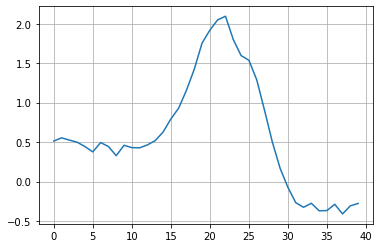

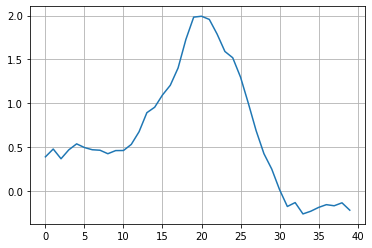

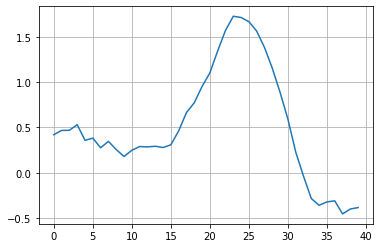

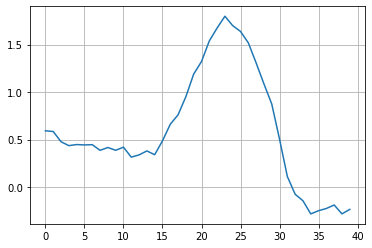

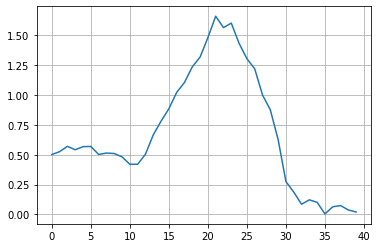

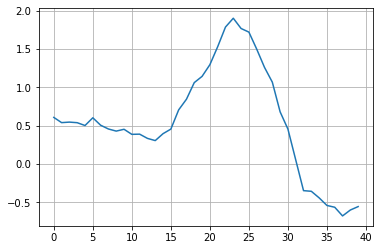

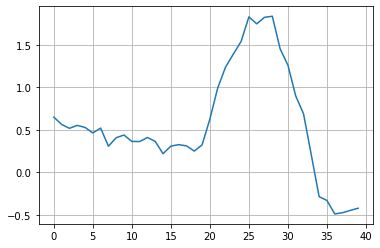

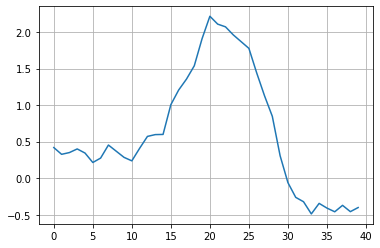

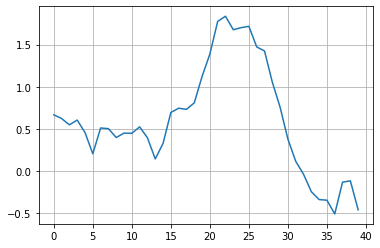

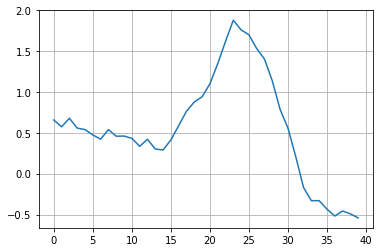

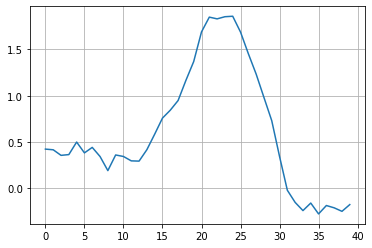

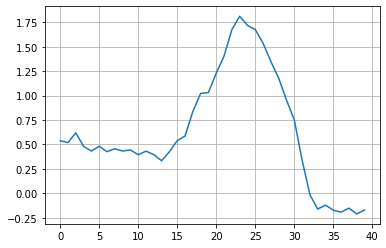

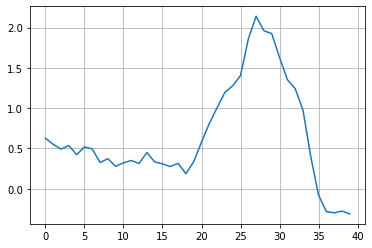

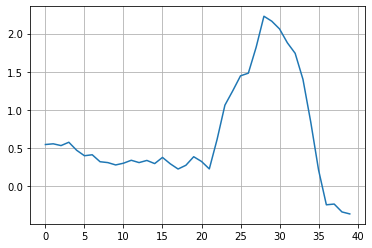

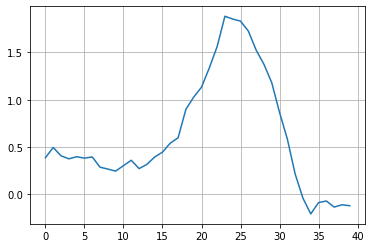

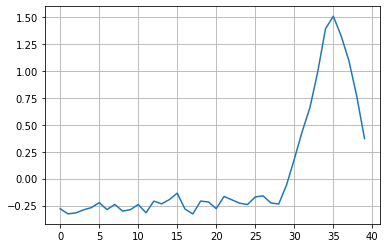

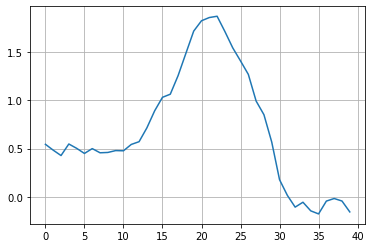

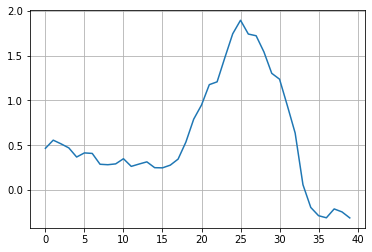

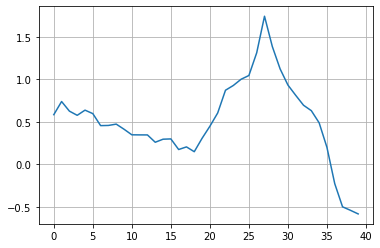

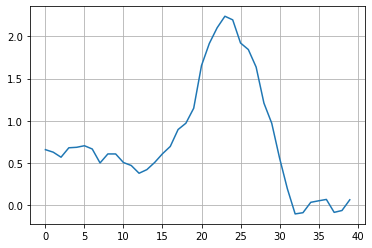

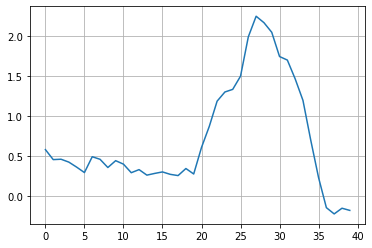

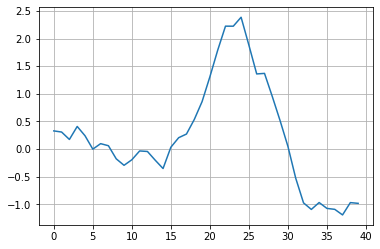

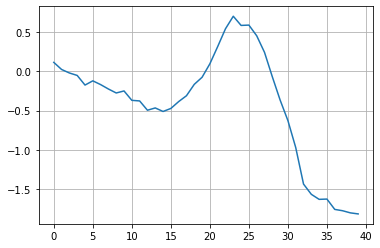

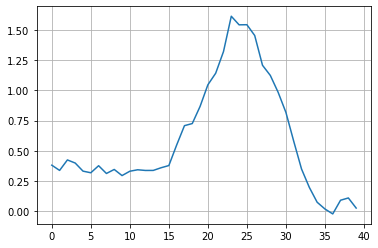

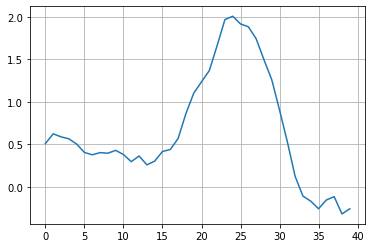

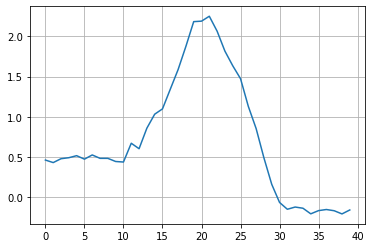

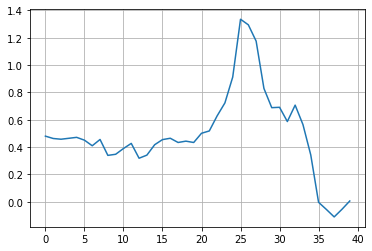

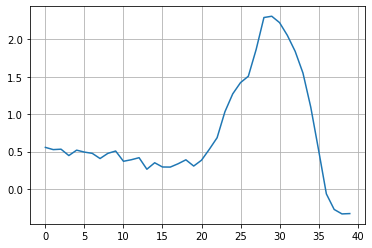

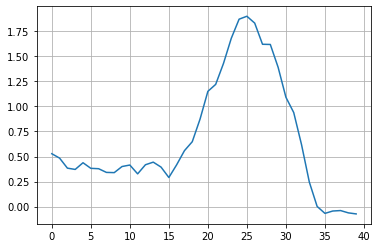

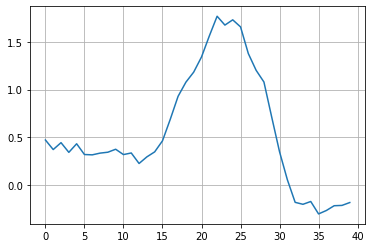

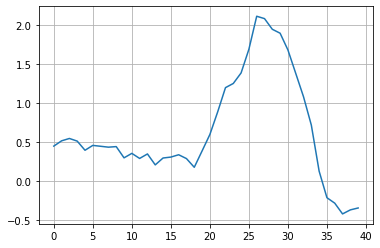

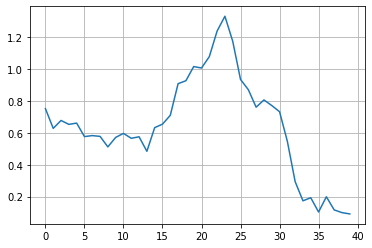

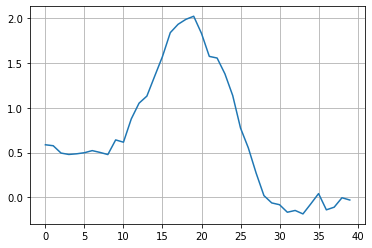

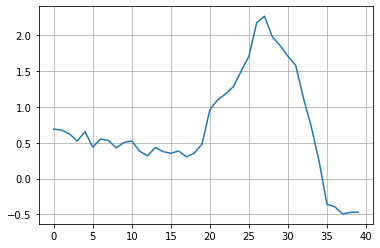

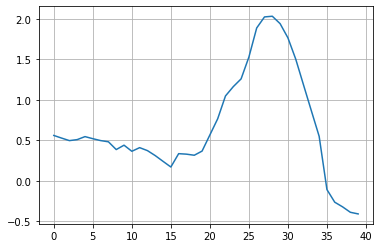

In [11]:
count2=0
for i in range(500):
    if y[i]==1:
        count1+=1
        plt.figure()
        plt.plot(x[i])
        plt.grid()

In [12]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2)

In [13]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()
Lr.fit(x_train,y_train)
y_pred=Lr.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)

97.89999999999999


In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

print(accuracy_score(y_test,y_pred)*100)

98.7
